<a href="https://colab.research.google.com/github/Elsiekiprop/Dating-App-Recommender/blob/main/P5_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pata Mchumba Dating App Recommender

### Group Members

1. Fred Mutuma
2. Elsie Kiprop
3. Oscar Karuga
4. Iain Mosima
5. Peter Kigotho
6. Benson Muriu





## 1.1 Business Understanding.
With the current generation embracing technology and its applications, many people have become accustomed to the idea of using dating apps. Therefore, Pata Mchumba,  a dating company, has approached us to create a recommendation system for their users to increase the effectiveness of matches based on their preferences. Moreover our recommender will focus mainly on emotional connection rather than physical appearance. 

## 1.2 Objectives
### Main Objective:
To build a dating app recommender system that successfully maximises the matches.
### Specific Objectives
- To get and outline major factors that make a great match.

Answer the following questions:

- Which has more importance? Physical attraction or Personality.

- Which are the most common traits among users?

- To create a simple user interface for demonstration

## 1.3 Data Understanding
Our data was sourced from [here](https://www.tandfonline.com/doi/abs/10.1080/10691898.2015.11889737). We considered the ethical concerns and no rights were infringed in the collection of this data as OKCupid provided this data for use by the public.
The data contained 31 columns and 59964 columns.

## 1.4 Metrics for success
Our metric of success is Root Mean Squared Error (RMSE). We aim for a value that lies between 0.2 and 0.5 with a preference of the lowest value in this range for better accuracy of the model.

##1.5 Importing Libraries

In [40]:
#Importing necessary libraries
import pandas as pd
import numpy as np


try:
  from tabulate import tabulate
except:
  !pip install tabulate
  from tabulate import tabulate


try:
  from pandas_profiling import ProfileReport
except:
  !pip install pandas-profiling
  from pandas_profiling import ProfileReport

try:
  import gensim
except:
  !pip install gensim
  !pip install python_levenshtein
  import gensim
  from gensim.models import Word2Vec

from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# setting font size for all plots
font = {'size'   : 16}

plt.rc('font', **font)

In [41]:
#Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1.5.1 Reading the Data

In [42]:
#Importing dataset

dating_df = pd.read_csv('/content/drive/MyDrive/okcupid_profiles.csv')

In [43]:
pd.set_option('display.max_columns',None)

In [44]:
#First 5 rows of the data set
dating_df.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,pets,religion,sign,smokes,speaks,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,sometimes,english,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism but not too serious about it,cancer,no,"english (fluently), spanish (poorly), french (...",i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,2012-06-27-09-10,"san francisco, california",NaN,has cats,NaN,pisces but it doesn&rsquo;t matter,no,"english, french, c++","i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,2012-06-28-14-22,"berkeley, california",doesn't want kids,likes cats,NaN,pisces,no,"english, german (poorly)",i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,likes dogs and likes cats,NaN,aquarius,no,english,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN


###1.5.2 Checking the Data
In this section we will check for the shape of the data, number of unique vales and the number of missing values per column.

In [45]:
#Checking for the shape of the data
print("Number of rows:", dating_df.shape[0])
print("Number of columns:", dating_df.shape[1],'\n')

Number of rows: 59946
Number of columns: 31 



The dataset has 59946 rows and 31 columns

In [46]:
# Loop to check for missing values and unique values per column 
data_info = []
for i, column in enumerate(dating_df.columns):
    data_info.append([column, len(pd.unique(dating_df[column].values)), np.sum(pd.isnull(dating_df[column]))])

print(tabulate(data_info, headers=['Feature','No of unique values', 'No of null values']),"\n")   

Feature        No of unique values    No of null values
-----------  ---------------------  -------------------
age                             54                    0
status                           5                    0
sex                              2                    0
orientation                      3                    0
body_type                       13                 5296
diet                            19                24395
drinks                           7                 2985
drugs                            4                14080
education                       33                 6628
ethnicity                      218                 5680
height                          61                    3
income                          13                    0
job                             22                 8198
last_online                  30123                    0
location                       199                    0
offspring                       16              

The table above shows missing values per column and unique values per column. A number of columns have quite a huge number of missing values that we will deal with eventually in the notebook.

##1.6 Data Cleaning
In this section we will clean our data. This includes dealing with missing values. Natuaral Language processing will also be done to aid in cleaning text data in the essays columns.

###1.6.1 Checking null values percentage

In [47]:
dating_df.isna().sum()/len(dating_df)*100

age             0.000000
status          0.000000
sex             0.000000
orientation     0.000000
body_type       8.834618
diet           40.694959
drinks          4.979482
drugs          23.487806
education      11.056618
ethnicity       9.475194
height          0.005005
income          0.000000
job            13.675641
last_online     0.000000
location        0.000000
offspring      59.321723
pets           33.231575
religion       33.740366
sign           18.443266
smokes          9.194942
speaks          0.083408
essay0          9.154906
essay1         12.631368
essay2         16.077803
essay3         19.143896
essay4         17.577486
essay5         18.099623
essay6         22.972342
essay7         20.770360
essay8         32.070530
essay9         21.023922
dtype: float64

Most of our columns seem to have the problem of missing data and that will be addressed in these subsequent cells. The `offspring` column is see to have the highest number of missing values at 59.3%.

###1.6.2 Checking datatypes

In [48]:
#Checking the data type for each column
dating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   status       59946 non-null  object 
 2   sex          59946 non-null  object 
 3   orientation  59946 non-null  object 
 4   body_type    54650 non-null  object 
 5   diet         35551 non-null  object 
 6   drinks       56961 non-null  object 
 7   drugs        45866 non-null  object 
 8   education    53318 non-null  object 
 9   ethnicity    54266 non-null  object 
 10  height       59943 non-null  float64
 11  income       59946 non-null  int64  
 12  job          51748 non-null  object 
 13  last_online  59946 non-null  object 
 14  location     59946 non-null  object 
 15  offspring    24385 non-null  object 
 16  pets         40025 non-null  object 
 17  religion     39720 non-null  object 
 18  sign         48890 non-null  object 
 19  smok

In [49]:
# checking for abnormality in the numerical columns
dating_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,59946.0,32.340290,9.452779,18.0,26.0,30.0,37.0,110.0
height,59943.0,68.295281,3.994803,1.0,66.0,68.0,71.0,95.0
income,59946.0,20033.222534,97346.192104,-1.0,-1.0,-1.0,-1.0,1000000.0


###1.6.2 The Body Type Column

In [50]:
#check value count of body type
dating_df['body_type'].value_counts()

average           14652
fit               12711
athletic          11819
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198
Name: body_type, dtype: int64

For this column we will fill the missing values using with `unspecified` since a user may have skipped the section to fill in information on their body type.

In [51]:
#Replacing the missing values with unspecified.
dating_df['body_type'].fillna('Unspecified',inplace=True)

In [52]:
#check value count of diet
dating_df['diet'].value_counts()

mostly anything        16585
anything                6183
strictly anything       5113
mostly vegetarian       3444
mostly other            1007
strictly vegetarian      875
vegetarian               667
strictly other           452
mostly vegan             338
other                    331
strictly vegan           228
vegan                    136
mostly kosher             86
mostly halal              48
strictly halal            18
strictly kosher           18
halal                     11
kosher                    11
Name: diet, dtype: int64

###1.6.3 The Diet Column


For this column we noticed that some of the option are similar therefore we will replace similar classes with the same class. 

In [53]:
dating_df['diet'] = dating_df['diet'].replace(['mostly anything','strictly anything'],'anything')
dating_df['diet'] = dating_df['diet'].replace(['mostly vegetarian','strictly vegetarian','mostly vegan','strictly vegan','vegan'],'vegetarian')
dating_df['diet'] = dating_df['diet'].replace(['mostly halal','strictly halal'],'halal')
dating_df['diet'] = dating_df['diet'].replace(['mostly kosher','strictly kosher'],'kosher')
dating_df['diet'] = dating_df['diet'].replace(['mostly other','strictly other'],'other')

dating_df['diet'].fillna('Unspecified',inplace=True)

###1.6.4 The Drinks Column

The missing values in the drinks column will be replaced with unspecified since some users may choose not to disclose that information.

In [54]:
#check value count of drinks
dating_df['drinks'].value_counts()

socially       41780
rarely          5957
often           5164
not at all      3267
very often       471
desperately      322
Name: drinks, dtype: int64

In [55]:
dating_df['drinks'].fillna('Unspecified',inplace=True)

In [56]:
dating_df.drinks.value_counts()

socially       41780
rarely          5957
often           5164
not at all      3267
Unspecified     2985
very often       471
desperately      322
Name: drinks, dtype: int64

In [57]:
def drinker(value):
    if value == 'socially' or value == 'often' or value == 'very often' or value == 'rarely' or value == 'desperately':
        return 1
    elif value == 'not at all':
      return 0
    else:
      return 2

In [58]:
dating_df['drinks2'] = dating_df.drinks.apply(lambda x: drinker(x))
dating_df['drinks2'].value_counts()

1    53694
0     3267
2     2985
Name: drinks2, dtype: int64

###1.6.5 The Drugs Column
Similar to the drinks column we will replace the null values with unspecified as some users chose not to put that information public.

In [59]:
#check value count of drinks
dating_df['drugs'].value_counts()

never        37724
sometimes     7732
often          410
Name: drugs, dtype: int64

In [60]:
#Replacing the null values with unspecified.
dating_df['drugs'].fillna('Unspecified',inplace=True)

In [61]:
def drugs(value):
    if value == 'often' or value == 'sometimes':
        return 1
    elif value == 'never':    
      return 0
      
    return 2

In [62]:
dating_df['drugs2'] = dating_df.drugs.apply(lambda x: drugs(x))
dating_df['drugs2'].value_counts()

0    37724
2    14080
1     8142
Name: drugs2, dtype: int64

###1.6.6 The Education Column

In [63]:
dating_df['education'].value_counts()

graduated from college/university    23959
graduated from masters program        8961
working on college/university         5712
working on masters program            1683
graduated from two-year college       1531
graduated from high school            1428
graduated from ph.d program           1272
graduated from law school             1122
working on two-year college           1074
dropped out of college/university      995
working on ph.d program                983
college/university                     801
graduated from space camp              657
dropped out of space camp              523
graduated from med school              446
working on space camp                  445
working on law school                  269
two-year college                       222
working on med school                  212
dropped out of two-year college        191
dropped out of masters program         140
masters program                        136
dropped out of ph.d program            127
dropped out

In [64]:
#Replacing the null values with unspecified because one may have not provided that information.
dating_df['education'].fillna('Unspecified',inplace=True)

###1.6.7 The Ethnicity Column

In [65]:
dating_df['ethnicity'].value_counts()

white                                                                 32831
asian                                                                  6134
hispanic / latin                                                       2823
black                                                                  2008
other                                                                  1706
                                                                      ...  
middle eastern, indian, white                                             1
asian, middle eastern, black, white, other                                1
asian, middle eastern, indian, hispanic / latin, white, other             1
black, native american, indian, pacific islander, hispanic / latin        1
asian, black, indian                                                      1
Name: ethnicity, Length: 217, dtype: int64

In [66]:
dating_df['ethnicity'].fillna('Unspecified',inplace=True)

###1.6.7 The Height Column

In [67]:
#dating_df['height'].value_counts()

In [68]:
# dropping null values in height 
# since there are only 0.005% are missing 

dating_df.dropna( subset=['height'],inplace=True)

###1.6.8 The Job Column

In [69]:
dating_df['job'].value_counts()

other                                7589
student                              4882
science / tech / engineering         4848
computer / hardware / software       4709
artistic / musical / writer          4438
sales / marketing / biz dev          4391
medicine / health                    3680
education / academia                 3513
executive / management               2373
banking / financial / real estate    2266
entertainment / media                2250
law / legal services                 1381
hospitality / travel                 1364
construction / craftsmanship         1021
clerical / administrative             805
political / government                708
rather not say                        436
transportation                        366
unemployed                            273
retired                               250
military                              204
Name: job, dtype: int64

In [70]:
#Filling the null values with unspecified.
dating_df['job'].fillna('Unspecified',inplace=True)

###1.6.9 The Offspring Column

In [71]:
#Checking the number of each unique value in the offsprings column
dating_df['offspring'].value_counts()

doesn't have kids                          7559
doesn't have kids, but might want them     3875
doesn't have kids, but wants them          3565
doesn't want kids                          2927
has kids                                   1883
has a kid                                  1881
doesn't have kids, and doesn't want any    1132
has kids, but doesn't want more             442
has a kid, but doesn't want more            275
has a kid, and might want more              231
wants kids                                  225
might want kids                             182
has kids, and might want more               115
has a kid, and wants more                    71
has kids, and wants more                     21
Name: offspring, dtype: int64

In [72]:
#Replacing the null values with unspecified
dating_df['offspring'].fillna('Unspecified',inplace=True)

###1.6.10 The Religion Column

In [73]:
#Checking number of each unique value in the the religion column
dating_df['religion'].value_counts()

agnosticism                                   2724
other                                         2691
agnosticism but not too serious about it      2636
agnosticism and laughing about it             2496
catholicism but not too serious about it      2318
atheism                                       2175
other and laughing about it                   2119
atheism and laughing about it                 2074
christianity                                  1957
christianity but not too serious about it     1952
other but not too serious about it            1554
judaism but not too serious about it          1517
atheism but not too serious about it          1318
catholicism                                   1064
christianity and somewhat serious about it     927
atheism and somewhat serious about it          848
other and somewhat serious about it            846
catholicism and laughing about it              726
judaism and laughing about it                  681
buddhism but not too serious ab

#### Creating a religion serious column
This section deals with replacing the null values in the religion column with `unspecified` and classifying the religions into those who are serious and those who arent serious with religion. Those that are serious will be under class 1. Those that arent serious will be represented with 0 and those who have not discoled their religion will be represented by 2

In [74]:
#Replacing null values with unspecified
dating_df['religion'].fillna('Unspecified',inplace=True)

In [75]:
def religion_serious(value):
   # checking if a user is serious with his/her religion
    if value.__contains__('not') or value.__contains__('laughing'):
        return 0
    elif value.__contains__('Unspecified'):
        return 2
        
    return 1

In [76]:
dating_df['religionSerious'] = dating_df.religion.copy().astype(str).apply(lambda x: religion_serious(x))
dating_df['religionSerious'].value_counts()

0    21207
2    20223
1    18513
Name: religionSerious, dtype: int64

In [77]:
# checking if the religion_serious function worked
dating_df[['religionSerious','religion']].sample(30)

,religionSerious,religion
21033,0,catholicism but not too serious about it
57440,0,christianity but not too serious about it
42285,0,judaism but not too serious about it
14537,2,Unspecified
42820,1,other
9343,1,christianity and very serious about it
19561,2,Unspecified
53168,1,other and somewhat serious about it
4843,1,atheism
38389,0,other and laughing about it


**Creating a religion only column**



In [78]:
def religion(value):
    # splitting the column and extracting the first string
    religion = value.split(' ')[0]
    return religion

In [79]:
dating_df.religion = dating_df.religion.astype(str).apply(lambda x: religion(x))
dating_df.religion[:10]

0     agnosticism
1     agnosticism
2     Unspecified
3     Unspecified
4     Unspecified
5         atheism
6     Unspecified
7    christianity
8    christianity
9         atheism
Name: religion, dtype: object

In [80]:
# checking the value counts and converting the column into a string datatype
dating_df.religion.value_counts()

Unspecified     20223
agnosticism      8812
other            7743
atheism          6985
christianity     5787
catholicism      4758
judaism          3098
buddhism         1948
hinduism          450
islam             139
Name: religion, dtype: int64

###1.6.11 The Zodiac Column
To deal with the missing values in this section, we will fill the missing values with uninterested as zodiac signs do not matter to some people.
We will further clean the column and only pick out the zodiac sign and remove the rest of the text in each row.

In [81]:
dating_df['sign'].value_counts()

gemini and it&rsquo;s fun to think about         1782
scorpio and it&rsquo;s fun to think about        1772
leo and it&rsquo;s fun to think about            1692
libra and it&rsquo;s fun to think about          1649
taurus and it&rsquo;s fun to think about         1640
cancer and it&rsquo;s fun to think about         1597
pisces and it&rsquo;s fun to think about         1592
sagittarius and it&rsquo;s fun to think about    1583
virgo and it&rsquo;s fun to think about          1574
aries and it&rsquo;s fun to think about          1573
aquarius and it&rsquo;s fun to think about       1503
virgo but it doesn&rsquo;t matter                1497
leo but it doesn&rsquo;t matter                  1457
cancer but it doesn&rsquo;t matter               1454
gemini but it doesn&rsquo;t matter               1453
taurus but it doesn&rsquo;t matter               1450
libra but it doesn&rsquo;t matter                1408
aquarius but it doesn&rsquo;t matter             1408
capricorn and it&rsquo;s fun

**Creating a sign serious column**

In [82]:
#Replacing the missing values with uninterested.
dating_df['sign'].fillna('Uninterested',inplace=True)

In [83]:
def sign_serious(value):
   # checking if a user is serious with his/her religion
    if value.__contains__('doesn&rsquo;t'):
        return 0
    elif value.__contains__('it&rsquo;s'):
        return 1
        
    return 2

In [84]:
dating_df['signSerious'] = dating_df.sign.copy().astype(str).apply(lambda x: sign_serious(x))
dating_df['signSerious'].value_counts()

2    23852
1    19333
0    16758
Name: signSerious, dtype: int64

In [85]:
# checking if the religion_serious function worked
dating_df[['signSerious','sign']].sample(30)

,signSerious,sign
29772,1,gemini and it&rsquo;s fun to think about
37634,0,libra but it doesn&rsquo;t matter
39435,1,pisces and it&rsquo;s fun to think about
57641,1,cancer and it&rsquo;s fun to think about
4491,0,leo but it doesn&rsquo;t matter
37061,1,capricorn and it&rsquo;s fun to think about
27163,1,aquarius and it&rsquo;s fun to think about
49714,2,Uninterested
51221,0,libra but it doesn&rsquo;t matter
17582,2,libra


**Creating a zodiac only column**

In [86]:
# doing the same thing as in the religion function
def zodiac_sign(value):
    zodiac = value.split(' ')[0]
    return zodiac

In [87]:
dating_df.sign = dating_df.sign.astype(str).apply(lambda x: zodiac_sign(x))
dating_df.sign[:10]

0         gemini
1         cancer
2         pisces
3         pisces
4       aquarius
5         taurus
6          virgo
7    sagittarius
8         gemini
9         cancer
Name: sign, dtype: object

###1.6.11 The Smokes Column

In [88]:
# checking the value counts
dating_df['smokes'].value_counts()

no                43895
sometimes          3787
when drinking      3040
yes                2231
trying to quit     1480
Name: smokes, dtype: int64

In [89]:
# Fill null values with unspecified
dating_df['smokes'].fillna('Unspecified',inplace=True)

In [90]:
def smoker(value):
    if value == 'sometimes' or value == 'when drinking' or value == 'yes' or value == 'trying to quit' :
        return 1
    elif value=='no':
        return 0
    else:
        return 2

In [91]:
dating_df['smokes2'] = dating_df.smokes.apply(lambda x: smoker(x))
dating_df['smokes2'].value_counts()

0    43895
1    10538
2     5510
Name: smokes2, dtype: int64

###1.6.12 The Speaks Column

In [92]:
# Checking the value counts 
dating_df['speaks'].value_counts()

english                                                                21827
english (fluently)                                                      6627
english (fluently), spanish (poorly)                                    2059
english (fluently), spanish (okay)                                      1917
english (fluently), spanish (fluently)                                  1288
                                                                       ...  
english (fluently), urdu (poorly), japanese (poorly), french (okay)        1
english, spanish, hindi, c++                                               1
english (fluently), japanese (okay), thai (okay), chinese (poorly)         1
english (fluently), french (okay), italian (okay), hebrew (okay)           1
english (fluently), french, farsi                                          1
Name: speaks, Length: 7647, dtype: int64

In [93]:
# filling null values with unspecified
dating_df['speaks'].fillna('Unspecified',inplace=True)

Since we are considering an emotional match recommender system we won't consider height,job and income to prevent the recommender system from being biased

###1.6.13 Dropping columns

In [94]:
def column_dropper(df):
    return df.drop(columns=['ethnicity', 'height', 'income', 'job', 'offspring', 'speaks', 'last_online'])

In [95]:
# Dropping features not to be utilized by the recommendation engine
dating_df = column_dropper(dating_df)

###1.6.14 Filtering out the data

In [96]:
# keep only available people in the recommendation database 
dating_df = dating_df[dating_df.status.isin(['single', 'available'])].drop(columns='status')

###1.6.15 The Location Column

In [97]:
dating_df['location'].value_counts()

san francisco, california    29919
oakland, california           6886
berkeley, california          3977
san mateo, california         1291
palo alto, california         1013
                             ...  
sunnyvale, california            1
islip terrace, new york          1
boise, idaho                     1
peoria, illinois                 1
rochester, michigan              1
Name: location, Length: 193, dtype: int64

In [98]:
# taking the state only from the location column
def state_getter(string):
    return string.split(',')[1]

dating_df['state'] = dating_df.location.apply(lambda x: state_getter(x))
# printing total states
print('Number of states:', len(dating_df['state'].unique()))
dating_df.state.value_counts()[:10]

Number of states: 38


 california              57473
 new york                   16
 illinois                    8
 texas                       4
 oregon                      4
 massachusetts               4
 michigan                    4
 arizona                     3
 florida                     3
 district of columbia        2
Name: state, dtype: int64

In [99]:
# droppping the location column
dating_df.drop('location', axis=1, inplace=True)

### 1.6.16 The Pets Column

In [100]:
# checking the sum of null values
dating_df.pets.isna().sum()

19382

In [101]:
# filling null values with unspecified
dating_df.pets.fillna('Unspecified', inplace=True)
dating_df.pets.isna().sum()

0

In [102]:
dating_df['pets'].value_counts()

Unspecified                        19382
likes dogs and likes cats          14100
likes dogs                          7026
has dogs                            4022
likes dogs and has cats             4000
has dogs and likes cats             2223
likes dogs and dislikes cats        1960
has dogs and has cats               1373
has cats                            1328
likes cats                           973
has dogs and dislikes cats           534
dislikes dogs and likes cats         215
dislikes dogs and dislikes cats      188
dislikes cats                        121
dislikes dogs and has cats            72
dislikes dogs                         42
Name: pets, dtype: int64

In [103]:
# replacing has with likes
# 1. The code checks if the value is a string
# 2. If it is a string, it replaces the word 'has' with 'likes'
# 3. If it is not a string, it returns the value as it is

dating_df.pets = dating_df.pets.apply(lambda x: x.replace('has', 'likes') if isinstance(x, str) else x)

In [104]:
dating_df['pets'].value_counts()

likes dogs and likes cats          21696
Unspecified                        19382
likes dogs                         11048
likes dogs and dislikes cats        2494
likes cats                          2301
dislikes dogs and likes cats         287
dislikes dogs and dislikes cats      188
dislikes cats                        121
dislikes dogs                         42
Name: pets, dtype: int64

In [105]:
# using label encoder
le = LabelEncoder()
dating_df.pets = le.fit_transform(dating_df.pets)
dating_df.pets.value_counts()

8    21696
0    19382
6    11048
7     2494
5     2301
4      287
3      188
1      121
2       42
Name: pets, dtype: int64

In [106]:
# inversing
le.inverse_transform(dating_df.pets)

array(['likes dogs and likes cats', 'likes dogs and likes cats',
       'likes cats', ..., 'Unspecified', 'likes dogs and likes cats',
       'likes dogs and likes cats'], dtype=object)

In [107]:
dating_df.columns

Index(['age', 'sex', 'orientation', 'body_type', 'diet', 'drinks', 'drugs',
       'education', 'pets', 'religion', 'sign', 'smokes', 'essay0', 'essay1',
       'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8',
       'essay9', 'drinks2', 'drugs2', 'religionSerious', 'signSerious',
       'smokes2', 'state'],
      dtype='object')

### 1.6.17 The Age Column

In [108]:
dating_df.age.describe().T

count    57559.000000
mean        32.419604
std          9.510161
min         18.000000
25%         26.000000
50%         30.000000
75%         37.000000
max        110.000000
Name: age, dtype: float64

There seems to be prescence of outliers in the age column

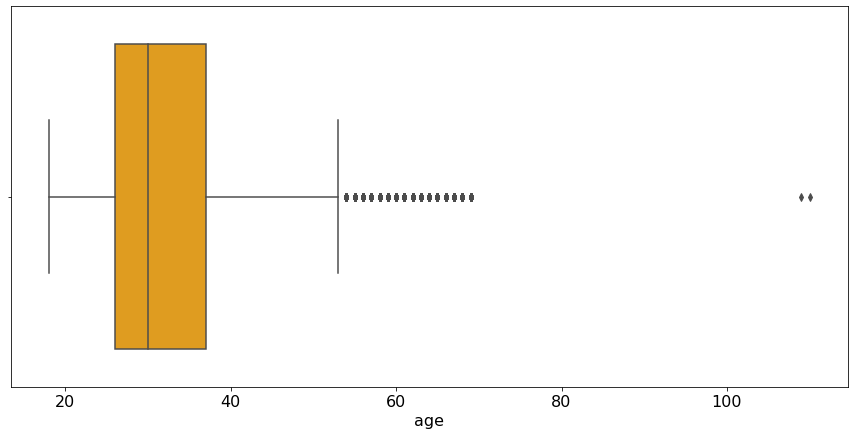

In [109]:
# plotting the outliers
fig, ax = plt.subplots(figsize=(15,7))
sns.boxplot(x=dating_df.age, ax=ax, color='orange')
plt.show()

In [110]:
# checking the 95% quantile range
dating_df.age.quantile(.95)

52.0

In [111]:
# capping of ages above the 95% quantile to be the same value as the 95% quantile
def age_capoff(value, cap_off_age=52):
  if value > cap_off_age:
        return cap_off_age

  return value

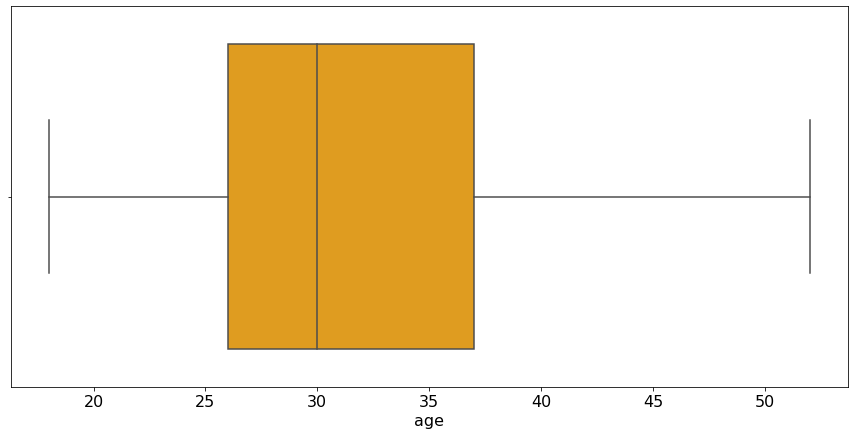

In [112]:
# plotting after dealing with the outliers
fig, ax = plt.subplots(figsize=(15,7))
sns.boxplot(x=dating_df.age.apply(lambda x: age_capoff(x)), ax=ax, color='orange')
plt.show()

In [113]:
# replacing the values in the age column
dating_df.age = dating_df.age.apply(lambda x: age_capoff(x))

### 1.6.18 Checking For Abnormality

**The drugs columns**

In [114]:
# checking for abnormality
drugs_df = dating_df[['drugs','smokes','drinks','drugs2','smokes2','drinks2']]
drugs_df.sample(20, replace=True)

,drugs,smokes,drinks,drugs2,smokes2,drinks2
4924,Unspecified,sometimes,socially,2,1,1
39183,Unspecified,sometimes,socially,2,1,1
28613,never,no,rarely,0,0,1
29746,never,no,rarely,0,0,1
8495,sometimes,no,socially,1,0,1
8555,never,sometimes,often,0,1,1
13568,never,trying to quit,socially,0,1,1
8256,never,yes,rarely,0,1,1
44356,Unspecified,no,Unspecified,2,0,2
26511,Unspecified,Unspecified,Unspecified,2,2,2


In [115]:
display(drugs_df.shape)
dating_df.shape

(57559, 6)

(57559, 28)

In [116]:
dating_df.duplicated().sum()

19

In [117]:
# it can be deduced that some users use drugs but still fill
# they ain't using drugs hence a function will help to set them 
# to True
# This function also removes duplicates
def drug_confimer(df):
    smokes_df = df[ df['smokes2'] == 1]
    # filling drugs column with nulls
    smokes_df.loc[:, 'drugs2'] = 1

    # doing the same with the drinks column
    drinks_df = df[ df['drinks2'] == 1]
    # filling drugs column with nulls
    drinks_df.loc[:, 'drugs2'] = 1

    # fetching only those that do not use any drug at all
    no_drugs_df = df[ (df['drugs2']== 0) &  (df['smokes2']== 0) & (df['drinks2']== 0) ]

    # concating all the dfs
    final_df = pd.concat([smokes_df, drinks_df, no_drugs_df])

    # dropping_duplicates
    final_df.drop_duplicates(inplace=True)

    return final_df

In [118]:
cleaned_dating_df = drug_confimer(dating_df)
cleaned_dating_df.shape

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


(54519, 28)

In [119]:
cleaned_dating_df.duplicated().sum()

0

In [120]:
# checking if the function worked
cleaned_dating_df[['drugs','smokes','drinks','drugs2','smokes2','drinks2']].sample(20, replace=True, random_state=100)

,drugs,smokes,drinks,drugs2,smokes2,drinks2
40283,never,no,socially,1,0,1
5689,sometimes,no,socially,1,0,1
2850,never,no,socially,1,0,1
485,sometimes,yes,socially,1,1,1
8750,never,no,socially,1,0,1
9355,never,no,socially,1,0,1
5853,never,no,socially,1,0,1
59923,never,sometimes,socially,1,1,1
14845,never,no,socially,1,0,1
5347,Unspecified,no,socially,1,0,1


In [121]:
# further analysis
cleaned_dating_df[cleaned_dating_df.drugs2 == True ][['drugs','smokes','drinks','drugs2','smokes2','drinks2']].sample(20, replace=True)

,drugs,smokes,drinks,drugs2,smokes2,drinks2
5591,never,no,socially,1,0,1
22447,Unspecified,when drinking,socially,1,1,1
49122,never,no,socially,1,0,1
2557,never,no,socially,1,0,1
20247,Unspecified,no,socially,1,0,1
47806,sometimes,when drinking,often,1,1,1
20312,Unspecified,no,socially,1,0,1
4445,never,no,socially,1,0,1
22792,never,Unspecified,socially,1,2,1
13564,often,yes,socially,1,1,1


### 1.6.19 Exporting Cleaned Data

In [123]:
# exporting the cleaned data
# cleaned_dating_df.to_csv('/content/drive/MyDrive/patamchumbadata/dating_df_cleaned.csv', index=True)

## 1.7 Exploratory Data Analysis
In the EDA section we will create a number of visualizations to have a better understanding of our data and its attributes.

In [ ]:
#Function that will help in allocating percentages to different features in our plots.
def feature_percentage(plot, variable):
    total = len(variable)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x()+p.get_width()/2-0.1
        y = p.get_y()+p.get_height()
        ax.annotate(percentage, (x, y), size=10)

### 1.7.1 Gender Analysis.

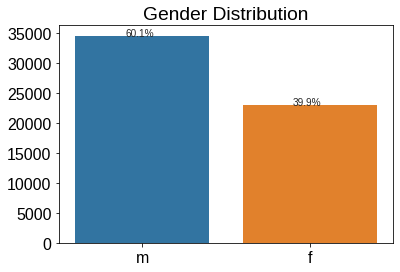

In [ ]:
gender = dating_df['sex'].value_counts()
ax=sns.barplot(x=gender.index, y=gender.values)
plt.title('Gender Distribution')

plt.style.use('seaborn')
feature_percentage(ax,dating_df)
plt.show()

From the above plot majority of the users are male at 59.8% and female follow closely at 40.2%

### 1.7.2 Age Analysis

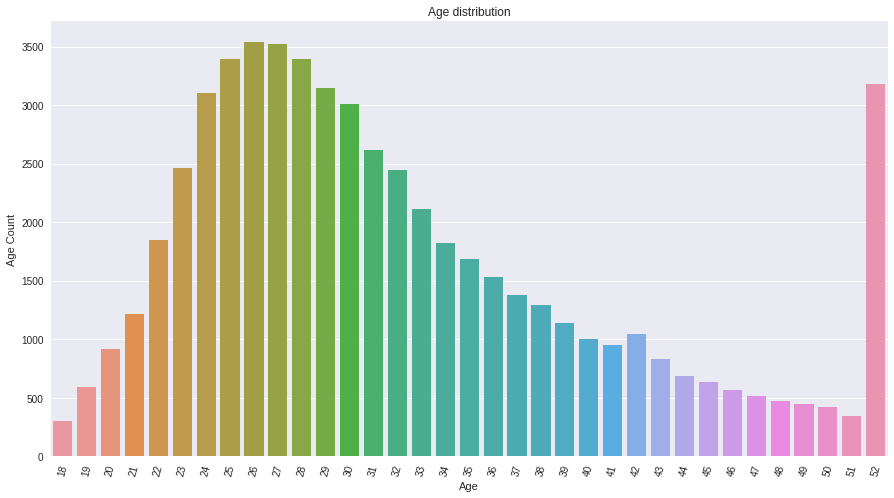

In [ ]:
#Plot showing age distribution
#plt.hist(x=dating_df.age)
age= dating_df['age'].value_counts()
plt.figure(figsize=(15,8))
sns.barplot(x=age.index, y=age.values)
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Age Count')
plt.style.use('seaborn')
plt.xticks(rotation=75)
plt.show()

Majority of the users are between 22 and 35. However there seems to be odd ages on the dating site such as 109.

In [ ]:
#Checking for the minimum age and maximum age
print("min age:", dating_df['age'].min())
print("max age:", dating_df['age'].max())

min age: 18
max age: 52


In [ ]:
# Binning the ages to allow for better visualization
dating_df['age_bin']=pd.cut(x=dating_df['age'],bins=list(range(18,52,5)))

<Figure size 1440x720 with 0 Axes>

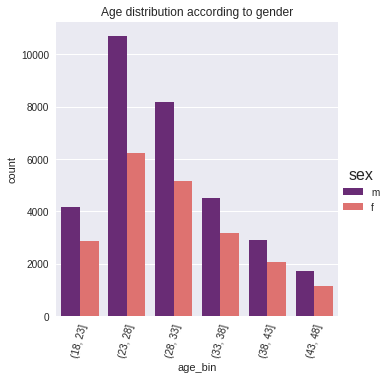

In [ ]:
#Plotting the age distribution
plt.figure(figsize=(20,10))
sns.catplot(x='age_bin', data= dating_df, kind='count',palette='magma',hue='sex')
plt.xticks(rotation=75)
plt.title('Age distribution according to gender')
plt.show()


Majority of the users of this app are male. Most of them are aged 23 to 28. That same age bracket holds the highest number of female users.

### 1.7.3 Investiging orientation count
In this section we will investigate orientation count based on each gender.

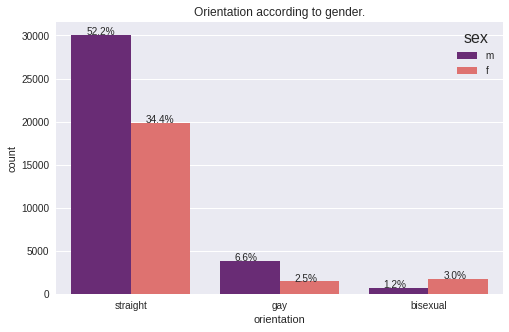

In [ ]:
#Plotting orinetation according to gender
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='orientation', data=dating_df, hue='sex', palette='magma',order=dating_df['orientation'].value_counts().iloc[:10].index) 
total = float(len(dating_df))
plt.title('Orientation according to gender.')
feature_percentage(ax,dating_df)
plt.show()


Majority of the users are of the orientation straight. Most of the straight users are male. This is the same case for the gay orientation For the bisexual orientation, majority are female.



###1.7.4 Investigating drug usage
In this section we investigate 3 columns i.e `drugs`, `drinks` and `smokes`


In [ ]:
#Drugs column
dating_df['drugs'].value_counts()

never          36428
Unspecified    13506
sometimes       7235
often            390
Name: drugs, dtype: int64

From the above information majority of the users do not drink while the minority drink often. We will visualize this in the plot below

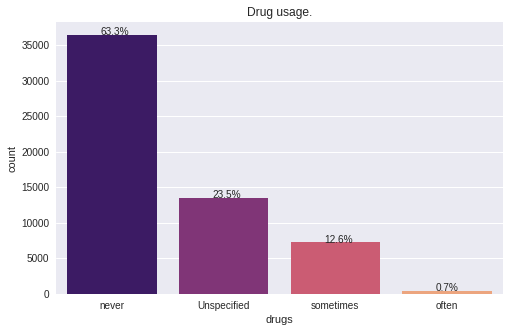

In [ ]:

plt.figure(figsize=(8, 5))
ax = sns.countplot(x='drugs', data=dating_df,  palette='magma',order=dating_df['drugs'].value_counts().iloc[:10].index) 
total = float(len(dating_df))
plt.title('Drug usage.')
feature_percentage(ax,dating_df)
plt.show()

It is evident that majority of the users(62.9%) do not do drugs.

###1.7.5 Investigating smoking frequency

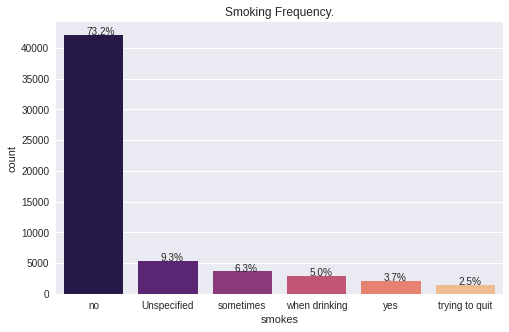

In [ ]:
#Visualization to show the count of users per smoking frequency.
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='smokes', data=dating_df,  palette='magma',order=dating_df['smokes'].value_counts().iloc[:10].index) 
total = float(len(dating_df))
plt.title('Smoking Frequency.')
feature_percentage(ax,dating_df)
plt.show()

73.2% of the dating app users do not smoke while those trying to quit take the lowest percentage at 2.5%

### 1.7.6 Alcohol Consumption

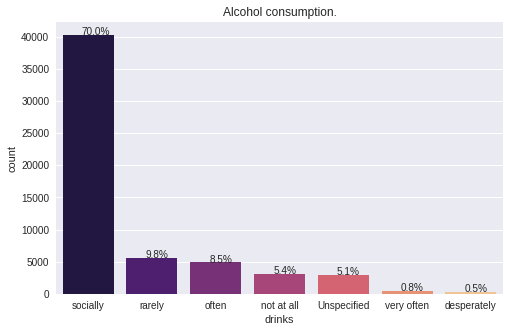

In [ ]:
#Visualizing the frequency of alcohol consumption among the users
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='drinks', data=dating_df,  palette='magma',order=dating_df['drinks'].value_counts().iloc[:10].index) 
total = float(len(dating_df))
plt.title('Alcohol consumption.')
feature_percentage(ax,dating_df)
plt.show()

During the cleaning, it will be very prudent to deal with the `-1` value.

###1.7.7 Diet preferences


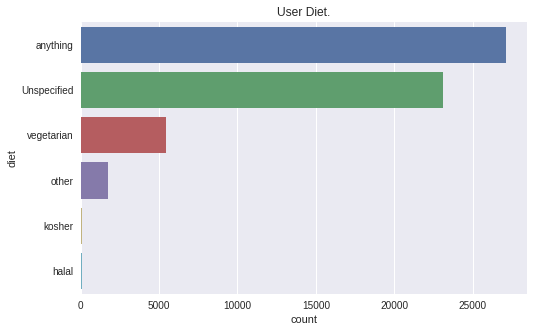

In [ ]:
#Checking the distribution of diet preferences among the users.
plt.figure(figsize=(8, 5))
ax = sns.countplot(y='diet', data=dating_df,order=dating_df['diet'].value_counts().iloc[:10].index) 
total = float(len(dating_df))
plt.title('User Diet.')

plt.show()

###1.7.7 Pets preferences

In [ ]:
dating_df.pets.value_counts()

8    21696
0    19382
6    11048
7     2494
5     2301
4      287
3      188
1      121
2       42
Name: pets, dtype: int64

In [ ]:
le.inverse_transform(dating_df.pets.value_counts().index)

array(['likes dogs and likes cats', 'Unspecified', 'likes dogs',
       'likes dogs and dislikes cats', 'likes cats',
       'dislikes dogs and likes cats', 'dislikes dogs and dislikes cats',
       'dislikes cats', 'dislikes dogs'], dtype=object)

In [ ]:
# creating a pets df
pets_df = pd.DataFrame(data=dating_df.pets.value_counts().values, index=dating_df.pets.value_counts().index, columns=['counts'])
pets_df['relationship'] = le.inverse_transform(dating_df.pets.value_counts().index)
pets_df.head()

,counts,relationship
8,21696,likes dogs and likes cats
0,19382,Unspecified
6,11048,likes dogs
7,2494,likes dogs and dislikes cats
5,2301,likes cats


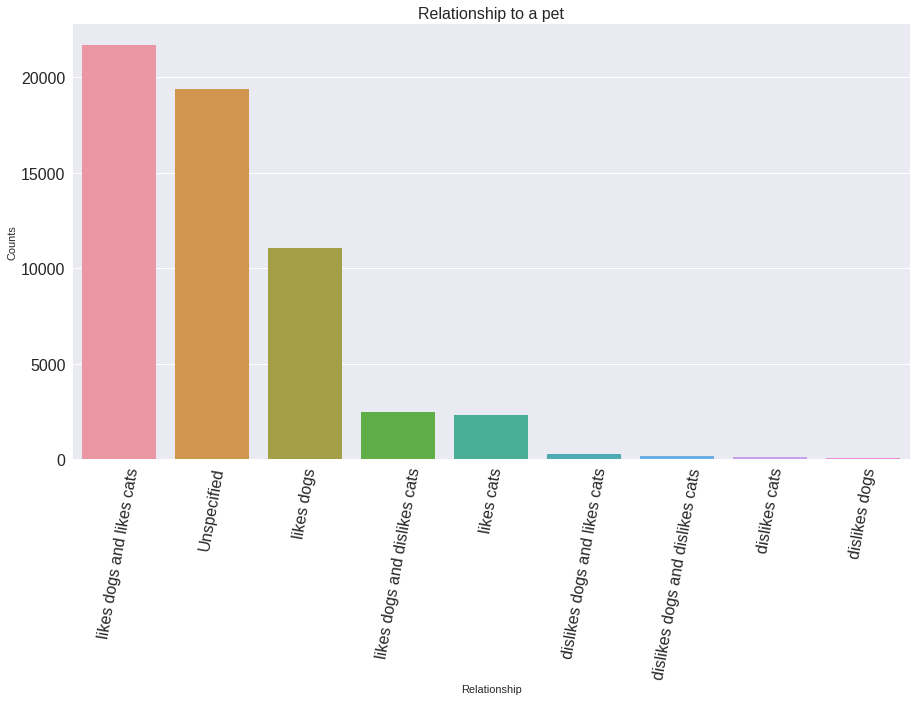

In [ ]:
#Plot showing age distribution
#plt.hist(x=dating_df.age)
plt.figure(figsize=(15,8))
sns.barplot(x=pets_df.relationship, y=pets_df.counts)
plt.title('Relationship to a pet', fontsize=16)
plt.xlabel('Relationship')
plt.ylabel('Counts')
plt.style.use('seaborn')
plt.xticks(rotation=80, fontsize=16)
plt.yticks(fontsize=16)
plt.show()

## 2.0 Text Cleaning & Preprocessing & More Exploration

Notice the essay columns are untouched upto now. This section eill deal with the text data that makes up the essay columns. proper labeling of the columns too.

Then some visualizations before building the model later on.

For starters the following will be performed:
- Remove punctuation and numbers
- Lowercase everything
- Remove stopwords
- Create a document term matrix grouped by essay 
    - count vectorization
    - tf-idf vectorization
    - bi-grams
- Visualize most frequent words
    - word clouds
    - bar plot/histogram

Check the dataframe before proceeding; change the essay column titles to something more meaningful

essay meanings:
 - essay
    - 0: My self summary
    - 1: What I’m doing with my life
    - 2: I’m really good at...
    - 3: The first thing people usually notice about me...
    - 4: Favourite books, movies, show, music, and food
    - 5: The six things I could never do without
    - 6: I spend a lot of time thinking about...
    - 7: On a typical Friday night I am...
    - 8: The most private thing I am willing to admit...
    - 9: You should message me if...


In [ ]:
#create a copy of the cleaned dataframe
new_df = cleaned_dating_df.copy()
new_df.head(2)

,age,sex,orientation,body_type,diet,drinks,drugs,education,pets,religion,sign,smokes,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,drinks2,drugs2,religionSerious,signSerious,smokes2,state
0,22,m,straight,a little extra,anything,socially,never,working on college/university,8,agnosticism,gemini,sometimes,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...,1,1,1,2,1,california
8,24,f,straight,Unspecified,anything,socially,Unspecified,graduated from college/university,8,christianity,gemini,when drinking,NaN,"oh goodness. at the moment i have 4 jobs, so i...",NaN,i'm freakishly blonde and have the same name a...,i am always willing to try new foods and am no...,sports/my softball glove coffee. because nobod...,NaN,"in or out... drinking with friends, maybe a ba...",potential friends/lovers/people who come in co...,http://www.youtube.com/watch?v=4dxbwzuwsxk let...,1,1,0,0,1,california


### Tidying the Dataset

In [ ]:
# change the names of essay columns to meaningful words

new_df.rename(columns = {'essay0':'selfSummary', 'essay1':'currentLife', 'essay2':'goodAt',
                     'essay3':'noticeFirst', 'essay4':'Favourites', 'essay5':'preciousThings',
                     'essay6':'thinkAbout', 'essay7':'typicalFriday', 'essay8':'privateAdmission',
                     'essay9':'messageIf'}, inplace = True)

In [ ]:
# check the new column names
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54519 entries, 0 to 59943
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               54519 non-null  int64 
 1   sex               54519 non-null  object
 2   orientation       54519 non-null  object
 3   body_type         54519 non-null  object
 4   diet              54519 non-null  object
 5   drinks            54519 non-null  object
 6   drugs             54519 non-null  object
 7   education         54519 non-null  object
 8   pets              54519 non-null  int64 
 9   religion          54519 non-null  object
 10  sign              54519 non-null  object
 11  smokes            54519 non-null  object
 12  selfSummary       49702 non-null  object
 13  currentLife       47947 non-null  object
 14  goodAt            46072 non-null  object
 15  noticeFirst       44474 non-null  object
 16  Favourites        45339 non-null  object
 17  preciousThin

#### Dealing with null values and duplicates in the Essay columns

In [ ]:
#check for duplicates in the dataset
new_df.duplicated().sum()

0

In [ ]:
#Filling null values in both data sets
new_df =new_df.fillna('')

### Text preprocessing

In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import nltk
import string
import re
from nltk import pos_tag
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import RegexpTokenizer, word_tokenize
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split, cross_validate
from numpy import array
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import ComplementNB


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


#### cleaning the essays 

we will use the our two functions together with the map() function to remove the links, tags and user handles from the essays.

In [ ]:
# Use regular expression to clean out the hash tags, links and punctuations from our tweet

def strip_links(text):
    """
    Remove links from our text
    """
    link_regex = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links = re.findall(link_regex, text)
    for link in links:
        text = text.replace(link[0], ', ')    
    return text

    

def strip_all_entities(text):
    """
    Remove user handles, hashtags and punctuations from our text
    """
    entity_prefixes = ['@','#']
    for separator in  string.punctuation:
        if separator not in entity_prefixes :
            text = text.replace(separator,' ')
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in entity_prefixes:
                words.append(word)
    return ' '.join(words)


Next, map the function above onto our essay columns.

In [ ]:
# map the functions onto the data set
new_df['selfSummary'] = new_df.selfSummary.map(lambda x: strip_all_entities(strip_links(x)))
new_df['currentLife'] = new_df.currentLife.map(lambda x: strip_all_entities(strip_links(x)))
new_df['goodAt'] = new_df.goodAt.map(lambda x: strip_all_entities(strip_links(x)))
new_df['noticeFirst'] = new_df.noticeFirst.map(lambda x: strip_all_entities(strip_links(x)))
new_df['Favourites'] = new_df.Favourites.map(lambda x: strip_all_entities(strip_links(x)))
new_df['preciousThings'] = new_df.preciousThings.map(lambda x: strip_all_entities(strip_links(x)))
new_df['thinkAbout'] = new_df.thinkAbout.map(lambda x: strip_all_entities(strip_links(x)))
new_df['typicalFriday'] = new_df.typicalFriday.map(lambda x: strip_all_entities(strip_links(x)))
new_df['privateAdmission'] = new_df.privateAdmission.map(lambda x: strip_all_entities(strip_links(x)))
new_df['messageIf'] = new_df.messageIf.map(lambda x: strip_all_entities(strip_links(x)))

In [ ]:
# Combining all 10 essays to a single column for each user
# Also fixing missing essays to blank values
new_df['all_essays'] = ''
essay_names = new_df.loc[:,['selfSummary','goodAt','Favourites','typicalFriday']]
for essay_name in essay_names:
    new_df[essay_name] = new_df[essay_name].replace(np.nan, ' ')
    new_df['all_essays'] = new_df[essay_name] + ' ' + new_df['all_essays']

### Tokenizing the essays

Let's remove the stopwords from our data set, ensure the words are in lower case, and then tokenize our dataset.



In [ ]:
# create a word tokenize
def tokenize_data(text):
    """
    A function responsible for tokenizing our sentences
    """
    # tokenize the data
    tokens = word_tokenize(text)

    # create our stopwords
    stopwords_list = stopwords.words('english')
    stopwords_list += [str(x) for x in range(100)]

    # convert everything to lowercase
    clean_list = [word.lower() for word in tokens if word.lower() not in stopwords_list]

    return clean_list

Next, map the function above onto our essay columns.

In [ ]:
# map the function above onto the columns
new_df['selfSummary'] = new_df.selfSummary.map(lambda x: tokenize_data(x))
new_df['currentLife'] = new_df.currentLife.map(lambda x: tokenize_data(x))
new_df['goodAt'] = new_df.goodAt.map(lambda x: tokenize_data(x))
new_df['noticeFirst'] = new_df.noticeFirst.map(lambda x: tokenize_data(x))
new_df['Favourites'] = new_df.Favourites.map(lambda x: tokenize_data(x))
new_df['thinkAbout'] = new_df.thinkAbout.map(lambda x: tokenize_data(x))
new_df['typicalFriday'] = new_df.typicalFriday.map(lambda x: tokenize_data(x))
new_df['privateAdmission'] = new_df.privateAdmission.map(lambda x: tokenize_data(x))
new_df['messageIf'] = new_df.messageIf.map(lambda x: tokenize_data(x))
new_df['all_essays'] = new_df.all_essays.map(lambda x: tokenize_data(x))

In [ ]:
new_df.to_csv('tokenized1_data.csv')

In [ ]:
#create a copy of the cleaned dataframe
tokenized_df = new_df.copy()
tokenized_df .head(2)

,age,sex,orientation,body_type,diet,drinks,drugs,education,pets,religion,sign,smokes,selfSummary,currentLife,goodAt,noticeFirst,Favourites,preciousThings,thinkAbout,typicalFriday,privateAdmission,messageIf,drinks2,drugs2,religionSerious,signSerious,smokes2,state,all_essays
0,22,m,straight,a little extra,anything,socially,never,working on college/university,8,agnosticism,gemini,sometimes,"[would, love, think, kind, intellectual, eithe...","[currently, working, international, agent, fre...","[making, people, laugh, ranting, good, salting...","[way, look, six, foot, half, asian, half, cauc...","[books, absurdistan, republic, mice, men, book...",food water cell phone shelter,"[duality, humorous, things]","[trying, find, someone, hang, anything, except...","[new, california, looking, someone, wisper, se...","[want, swept, feet, tired, norm, want, catch, ...",1,1,1,2,1,california,"[trying, find, someone, hang, anything, except..."
8,24,f,straight,Unspecified,anything,socially,Unspecified,graduated from college/university,8,christianity,gemini,when drinking,[],"[oh, goodness, moment, jobs, nice, find, one, ...",[],"[freakishly, blonde, name, hurricane, back]","[always, willing, try, new, foods, picky, howe...",sports my softball glove coffee because nobody...,[],"[drinking, friends, maybe, bar, dancing, pants...","[potential, friends, lovers, people, come, con...","[let, fun, maybe, get, little, trouble]",1,1,0,0,1,california,"[drinking, friends, maybe, bar, dancing, pants..."


### Lemmatizing the essay columns

After cleaning and tokenizing our data, the next step in our text preparation will be lemmatization. Lemmatization helps in transforming the text data by removing the suffixes of our data. Since lemmatizing uses part-of-speech tagging to determine how to transform a word, we'll need to incoperate word net in the lammetization.

Based on this below, i will create a function that converts the nltk parts-of-speech to wordnet tags. basically inputs the nltk pos tags and outputs the wordnet lemmatizer tags that can be interpretted by out lemmatizier

In [ ]:
# from nltk download averaged_perceptron_tagger
nltk.download('averaged_perceptron_tagger', quiet=True)

True

In [ ]:
# from nltk download tagsets
nltk.download('tagsets', quiet=True)

True

In [ ]:
# create a function that takes in the nltk POS tags and transforms them to wordnet tags
def wordnet_pos(word_tag):
    '''
    Translate nltk POS to wordnet tags
    '''
    if word_tag.startswith('J'):
        return wordnet.ADJ
    elif word_tag.startswith('V'):
        return wordnet.VERB
    elif word_tag.startswith('N'):
        return wordnet.NOUN
    elif word_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

Below i will index out the first user essay based on self summary, then perform POS tagging on the indexed tweet.

In [ ]:
# Index the first user in the selfSummary essay column
first_user = tokenized_df['selfSummary'][0]
first_user

['would',
 'love',
 'think',
 'kind',
 'intellectual',
 'either',
 'dumbest',
 'smart',
 'guy',
 'smartest',
 'dumb',
 'guy',
 'say',
 'tell',
 'difference',
 'love',
 'talk',
 'ideas',
 'concepts',
 'forge',
 'odd',
 'metaphors',
 'instead',
 'reciting',
 'cliches',
 'like',
 'simularities',
 'friend',
 'mine',
 'house',
 'underwater',
 'salt',
 'mine',
 'favorite',
 'word',
 'salt',
 'way',
 'weird',
 'choice',
 'know',
 'things',
 'life',
 'better',
 'metaphors',
 'seek',
 'make',
 'little',
 'better',
 'everyday',
 'productively',
 'lazy',
 'way',
 'got',
 'tired',
 'tying',
 'shoes',
 'considered',
 'hiring',
 'five',
 'year',
 'old',
 'would',
 'probably',
 'tie',
 'shoes',
 'decided',
 'wear',
 'leather',
 'shoes',
 'dress',
 'shoes',
 'love',
 'really',
 'serious',
 'really',
 'deep',
 'conversations',
 'really',
 'silly',
 'stuff',
 'willing',
 'snap',
 'light',
 'hearted',
 'rant',
 'kiss',
 'funny',
 'able',
 'make',
 'laugh',
 'able',
 'bend',
 'spoons',
 'mind',
 'telepath

In [ ]:
# Get the POS tags for the words in first_user essay
first_user = pos_tag(first_user)
first_user

[('would', 'MD'),
 ('love', 'VB'),
 ('think', 'VB'),
 ('kind', 'NN'),
 ('intellectual', 'JJ'),
 ('either', 'CC'),
 ('dumbest', 'JJS'),
 ('smart', 'JJ'),
 ('guy', 'NN'),
 ('smartest', 'JJS'),
 ('dumb', 'JJ'),
 ('guy', 'NNS'),
 ('say', 'VBP'),
 ('tell', 'VBP'),
 ('difference', 'NN'),
 ('love', 'NN'),
 ('talk', 'NN'),
 ('ideas', 'NNS'),
 ('concepts', 'VBP'),
 ('forge', 'NN'),
 ('odd', 'JJ'),
 ('metaphors', 'NNS'),
 ('instead', 'RB'),
 ('reciting', 'VBG'),
 ('cliches', 'NNS'),
 ('like', 'IN'),
 ('simularities', 'NNS'),
 ('friend', 'VBP'),
 ('mine', 'NN'),
 ('house', 'NN'),
 ('underwater', 'JJ'),
 ('salt', 'NN'),
 ('mine', 'NN'),
 ('favorite', 'JJ'),
 ('word', 'NN'),
 ('salt', 'NN'),
 ('way', 'NN'),
 ('weird', 'JJ'),
 ('choice', 'NN'),
 ('know', 'VBP'),
 ('things', 'NNS'),
 ('life', 'NN'),
 ('better', 'RBR'),
 ('metaphors', 'NNS'),
 ('seek', 'VBP'),
 ('make', 'VBP'),
 ('little', 'JJ'),
 ('better', 'JJR'),
 ('everyday', 'JJ'),
 ('productively', 'RB'),
 ('lazy', 'JJ'),
 ('way', 'NN'),
 ('got'

Based on the output above, we have have successfully gotten the the pos tags where the terms starting with `N` represent the nouns, `J` represents the adjective, `V` represents the verbs

Next, we will instantiate the lemmatizer and create a variable e.g X that contains the data from the column selfSummary.

#### Lemmatizing all essay Columns

In [ ]:
# inastantiate the lemmatizer
lemmatizer = WordNetLemmatizer() 

In [ ]:
# create various essay variable that contains the data from the essay columns 
selfSummary = tokenized_df['selfSummary']
currentLife = tokenized_df['currentLife']
goodAt = tokenized_df['goodAt']
noticeFirst = tokenized_df['noticeFirst']
Favourites = tokenized_df['Favourites']
preciousThings = tokenized_df['preciousThings']
thinkAbout = tokenized_df['thinkAbout']
typicalFriday = tokenized_df['typicalFriday']
privateAdmission = tokenized_df['privateAdmission']
messageIf = tokenized_df['messageIf']
all_essays =tokenized_df['all_essays']

In the code cell below, we will create a function that takes in the text from the variable X, gets the Pos tags of the text, then uses the wordnet_pos function above to get the wordnet tags that are then passed on to our lemmatizer.

In [ ]:
def word_lemma(text):
    '''
    Translate the text POS tags to Word net tags then pass it to the lemmatizer
    
    '''
    # get the pos tags for the text
    word_pos_tags = pos_tag(text)
    
    # translate the pos tags to word net tags
    word_net_tag = [(text[0], wordnet_pos(text[1])) for text in word_pos_tags]
    
    # Pass the text with the wordnet tags to the lemmatizer
    lemma_word = [lemmatizer.lemmatize(text[0], text[1]) for text in word_net_tag]
    
    return lemma_word
    

Map the function created above onto the essay variables created above to lemmetize each essay column.

In [ ]:
# map the function above
tokenized_df['selfSummary'] = selfSummary.map(lambda x: word_lemma(x))
tokenized_df['currentLife'] = currentLife.map(lambda x: word_lemma(x))
tokenized_df['goodAt'] = goodAt.map(lambda x: word_lemma(x))
tokenized_df['noticeFirst'] = noticeFirst.map(lambda x: word_lemma(x))
tokenized_df['Favourites'] = Favourites.map(lambda x: word_lemma(x))
tokenized_df['thinkAbout'] = thinkAbout.map(lambda x: word_lemma(x))
tokenized_df['typicalFriday'] = typicalFriday.map(lambda x: word_lemma(x))
tokenized_df['privateAdmission'] = privateAdmission.map(lambda x: word_lemma(x))
tokenized_df['messageIf'] = messageIf.map(lambda x: word_lemma(x))
tokenized_df['all_essays'] = all_essays.map(lambda x: word_lemma(x))


In [ ]:
tokenized_df.to_csv('lemmatized1_data.csv')

In [ ]:
lemmatized_df = tokenized_df.copy()
lemmatized_df.head(2)

,age,sex,orientation,body_type,diet,drinks,drugs,education,pets,religion,sign,smokes,selfSummary,currentLife,goodAt,noticeFirst,Favourites,preciousThings,thinkAbout,typicalFriday,privateAdmission,messageIf,drinks2,drugs2,religionSerious,signSerious,smokes2,state,all_essays
0,22,m,straight,a little extra,anything,socially,never,working on college/university,8,agnosticism,gemini,sometimes,"[would, love, think, kind, intellectual, eithe...","[currently, work, international, agent, freigh...","[make, people, laugh, rant, good, salt, find, ...","[way, look, six, foot, half, asian, half, cauc...","[book, absurdistan, republic, mouse, men, book...",food water cell phone shelter,"[duality, humorous, thing]","[try, find, someone, hang, anything, except, c...","[new, california, look, someone, wisper, secret]","[want, sweep, foot, tired, norm, want, catch, ...",1,1,1,2,1,california,"[try, find, someone, hang, anything, except, c..."
8,24,f,straight,Unspecified,anything,socially,Unspecified,graduated from college/university,8,christianity,gemini,when drinking,[],"[oh, goodness, moment, job, nice, find, one, c...",[],"[freakishly, blonde, name, hurricane, back]","[always, willing, try, new, food, picky, howev...",sports my softball glove coffee because nobody...,[],"[drink, friend, maybe, bar, dance, pant, watch...","[potential, friend, lover, people, come, conta...","[let, fun, maybe, get, little, trouble]",1,1,0,0,1,california,"[drink, friend, maybe, bar, dance, pant, watch..."


### Plot a Frequency Distribution for key words in eve all essay column

We will create a frequency distribution plot that shows the words that appear in all columns together with the count.

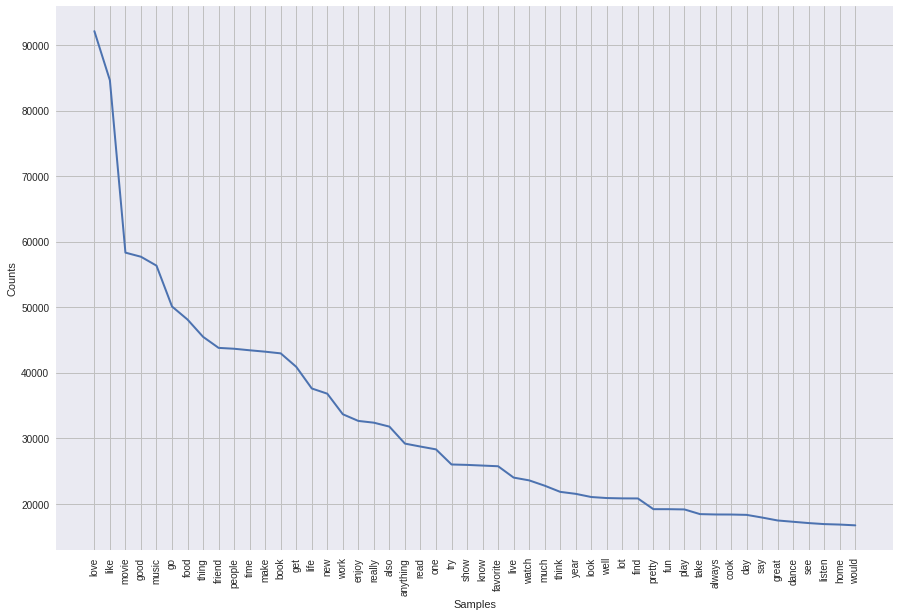

In [ ]:
sample = lemmatized_df['all_essays']
freq1_dist = []

for word in sample:
    freq1_dist.extend(word)
    
fdist = FreqDist(freq1_dist)
plt.figure(figsize=(15, 10))
ax.set_xlabel('x-axis', fontsize = 15)
ax.set_ylabel('y-axis', fontsize = 10)
fdist.plot(50);

The chart above shows most commonly used words in all essays

In [ ]:
# display the count of the first 200 texts
word_frequency = fdist.most_common(200)
word_frequency[:30]

[('love', 92119),
 ('like', 84620),
 ('movie', 58325),
 ('good', 57698),
 ('music', 56338),
 ('go', 50107),
 ('food', 48111),
 ('thing', 45478),
 ('friend', 43792),
 ('people', 43659),
 ('time', 43425),
 ('make', 43211),
 ('book', 42954),
 ('get', 40900),
 ('life', 37599),
 ('new', 36801),
 ('work', 33663),
 ('enjoy', 32644),
 ('really', 32377),
 ('also', 31776),
 ('anything', 29185),
 ('read', 28734),
 ('one', 28303),
 ('try', 26000),
 ('show', 25936),
 ('know', 25833),
 ('favorite', 25729),
 ('live', 23999),
 ('watch', 23574),
 ('much', 22761)]

In the code cell below, we will convert the lists in the essay column into a string.

In [ ]:
# convert the list into a string
lemmatized_df['selfSummary'] = lemmatized_df.selfSummary.map(lambda x: ' '.join(map(str, x)))
lemmatized_df['currentLife'] = lemmatized_df.currentLife.map(lambda x: ' '.join(map(str, x)))
lemmatized_df['goodAt'] = lemmatized_df.goodAt.map(lambda x: ' '.join(map(str, x)))
lemmatized_df['noticeFirst'] = lemmatized_df.noticeFirst.map(lambda x: ' '.join(map(str, x)))
lemmatized_df['Favourites'] = lemmatized_df.Favourites.map(lambda x: ' '.join(map(str, x)))
lemmatized_df['thinkAbout'] = lemmatized_df.thinkAbout.map(lambda x: ' '.join(map(str, x)))
lemmatized_df['typicalFriday'] = lemmatized_df.typicalFriday.map(lambda x: ' '.join(map(str, x)))
lemmatized_df['privateAdmission'] = lemmatized_df.privateAdmission.map(lambda x: ' '.join(map(str, x)))
lemmatized_df['messageIf'] = lemmatized_df.messageIf.map(lambda x: ' '.join(map(str, x)))

In [ ]:
lemmatized_df['all_essays'] = lemmatized_df.all_essays.map(lambda x: ' '.join(map(str, x)))

In [ ]:
lemmatized_df.head(2)

,age,sex,orientation,body_type,diet,drinks,drugs,education,pets,religion,sign,smokes,selfSummary,currentLife,goodAt,noticeFirst,Favourites,preciousThings,thinkAbout,typicalFriday,privateAdmission,messageIf,drinks2,drugs2,religionSerious,signSerious,smokes2,state,all_essays
0,22,m,straight,a little extra,anything,socially,never,working on college/university,8,agnosticism,gemini,sometimes,would love think kind intellectual either dumb...,currently work international agent freight for...,make people laugh rant good salt find simplici...,way look six foot half asian half caucasian mu...,book absurdistan republic mouse men book make ...,food water cell phone shelter,duality humorous thing,try find someone hang anything except club,new california look someone wisper secret,want sweep foot tired norm want catch coffee b...,1,1,1,2,1,california,try find someone hang anything except club boo...
8,24,f,straight,Unspecified,anything,socially,Unspecified,graduated from college/university,8,christianity,gemini,when drinking,,oh goodness moment job nice find one could set...,,freakishly blonde name hurricane back,always willing try new food picky however extr...,sports my softball glove coffee because nobody...,,drink friend maybe bar dance pant watch playin...,potential friend lover people come contact bew...,let fun maybe get little trouble,1,1,0,0,1,california,drink friend maybe bar dance pant watch play g...


### Word Cloud plot for various essays

Next, we will plot a word cloud visualization which depicts text in such a way that, the more frequent words appear enlarged as compared to less frequent words. This gives us a little insight into, how the data looks after being processed through all the steps until now.

#### selfSummary essay wordcloud

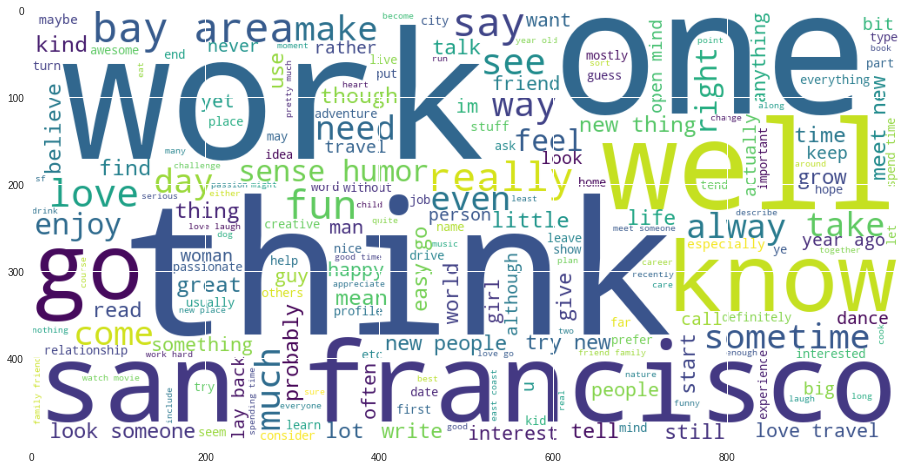

In [ ]:
mpl.rcParams['figure.figsize'] = 20,8
sample_data = lemmatized_df['selfSummary']

word_cloud =" "
for row in sample_data:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud);

#### currentLife essay wordcloud

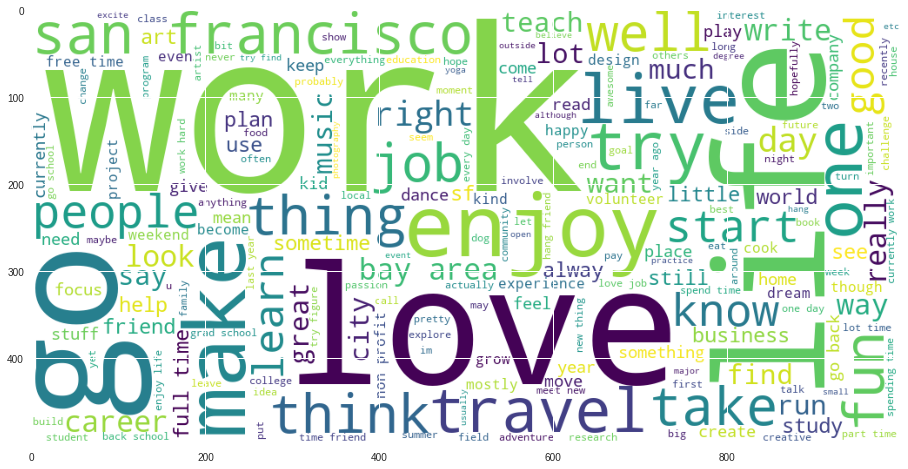

In [ ]:
mpl.rcParams['figure.figsize'] = 20,8
sample_data = lemmatized_df['currentLife']

word_cloud =" "
for row in sample_data:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud);

#### goodAt essay wordcloud

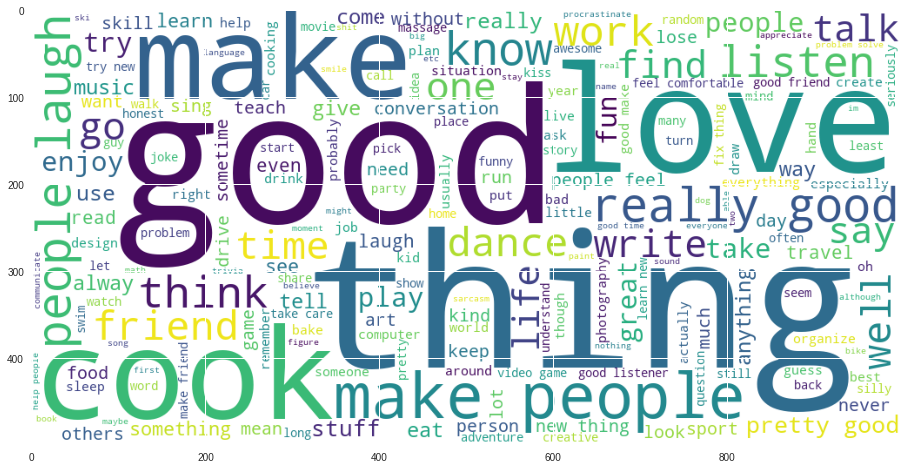

In [ ]:
mpl.rcParams['figure.figsize'] = 20,8
sample_data = lemmatized_df['goodAt']

word_cloud =" "
for row in sample_data:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud);

#### Favourites essay wordcloud

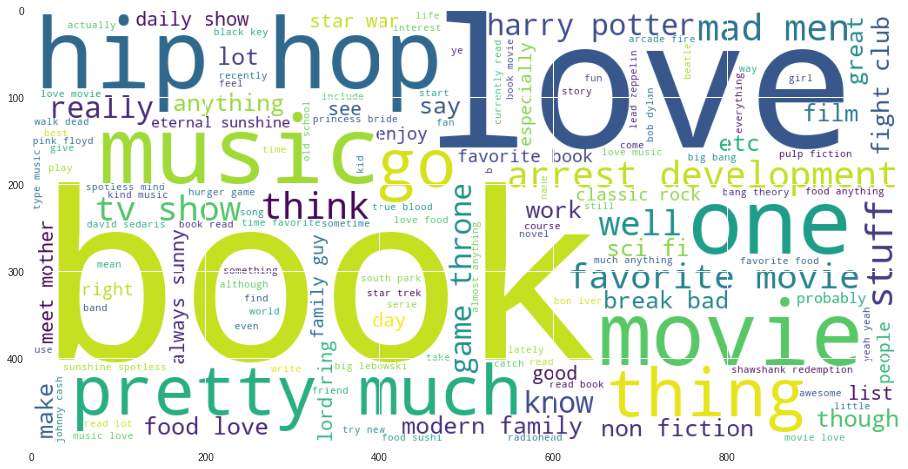

In [ ]:
mpl.rcParams['figure.figsize'] = 20,8
sample_data = lemmatized_df['Favourites']

word_cloud =" "
for row in sample_data:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud);

#### noticeFirst essay wordcloud

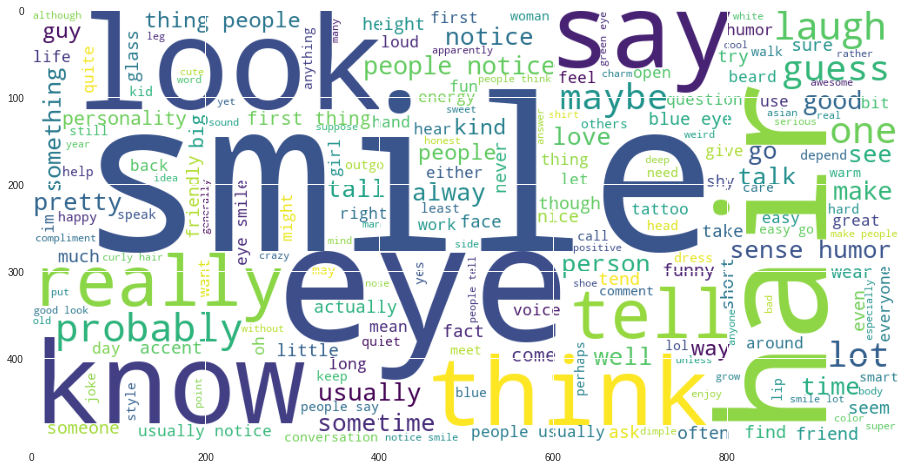

In [ ]:
mpl.rcParams['figure.figsize'] = 20,8
sample_data = lemmatized_df['noticeFirst']

word_cloud =" "
for row in sample_data:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud);

#### all_essays wordcloud

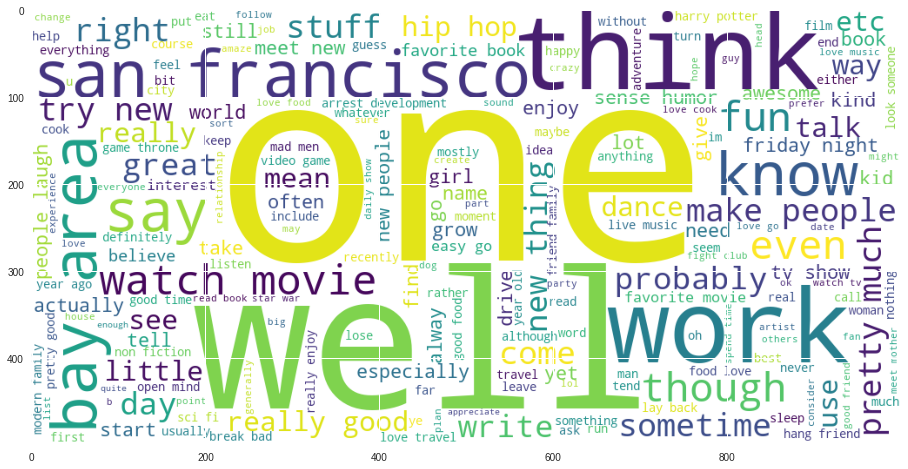

In [ ]:
mpl.rcParams['figure.figsize'] = 20,8
sample_data = lemmatized_df['all_essays']

word_cloud =" "
for row in sample_data:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud);

### TF-IDF VECTORIZER

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

#### The female essay df

In [ ]:
#creating a female essay dataFrame
female_essays = lemmatized_df[lemmatized_df['sex'] == 'f']
female_essays.head(2)

,age,sex,orientation,body_type,diet,drinks,drugs,education,pets,religion,sign,smokes,selfSummary,currentLife,goodAt,noticeFirst,Favourites,preciousThings,thinkAbout,typicalFriday,privateAdmission,messageIf,drinks2,drugs2,religionSerious,signSerious,smokes2,state,all_essays
8,24,f,straight,Unspecified,anything,socially,Unspecified,graduated from college/university,8,christianity,gemini,when drinking,,oh goodness moment job nice find one could set...,,freakishly blonde name hurricane back,always willing try new food picky however extr...,sports my softball glove coffee because nobody...,,drink friend maybe bar dance pant watch playin...,potential friend lover people come contact bew...,let fun maybe get little trouble,1,1,0,0,1,california,drink friend maybe bar dance pant watch play g...
30,27,f,straight,average,anything,socially,Unspecified,working on college/university,0,agnosticism,gemini,trying to quit,iiiiiiiiiiiiiiiiii hate talk move sf austin re...,pursuit,,,,,scenario probably never happen,,,wan na hang potentially expect wow right bat a...,1,1,1,2,1,california,iiiiiiiiiiiiiiiiii hate talk move sf austin re...


#### The female essay df

In [ ]:
male_essays = lemmatized_df[lemmatized_df['sex'] == 'm']
male_essays.head(2)

,age,sex,orientation,body_type,diet,drinks,drugs,education,pets,religion,sign,smokes,selfSummary,currentLife,goodAt,noticeFirst,Favourites,preciousThings,thinkAbout,typicalFriday,privateAdmission,messageIf,drinks2,drugs2,religionSerious,signSerious,smokes2,state,all_essays
0,22,m,straight,a little extra,anything,socially,never,working on college/university,8,agnosticism,gemini,sometimes,would love think kind intellectual either dumb...,currently work international agent freight for...,make people laugh rant good salt find simplici...,way look six foot half asian half caucasian mu...,book absurdistan republic mouse men book make ...,food water cell phone shelter,duality humorous thing,try find someone hang anything except club,new california look someone wisper secret,want sweep foot tired norm want catch coffee b...,1,1,1,2,1,california,try find someone hang anything except club boo...
10,35,m,straight,average,anything,socially,Unspecified,Unspecified,0,Unspecified,taurus,yes,update see someone market blue eye live missio...,three job sound lighting event make new friend...,hug kiss laugh motivate people massage cook re...,huge goofy smile,constantly read read friend describe incredibl...,family friends food women music reading,snowboard food woman goofy nerd stuff architec...,dinner drink friend work,use wish jetpack blowing candle birthday cake ...,complex woman healthy self esteem intelligent ...,1,1,2,2,1,california,dinner drink friends work constantly read read...


words commonly used by males in selfSummary

In [ ]:
tfIdfTransformer = TfidfTransformer(use_idf=True)
countVectorizer = CountVectorizer()
wordCount = countVectorizer.fit_transform(male_essays.all_essays)
newTfIdf = tfIdfTransformer.fit_transform(wordCount)
df = pd.DataFrame(newTfIdf[0].T.todense(), index=countVectorizer.get_feature_names(), columns=["TF-IDF"])
df = df.sort_values('TF-IDF', ascending=False)
print (df.head(25))

                  TF-IDF
shoe            0.292339
salt            0.239432
metaphor        0.183833
simplicity      0.182734
complexity      0.180663
rant            0.180663
simularities    0.144018
productively    0.138561
dumb            0.138461
periscope       0.134689
telepathically  0.131686
mallon          0.131686
absurdistan     0.127157
valkyrie        0.127157
delaware        0.125360
mine            0.125256
make            0.121776
borgia          0.121074
tying           0.121074
thorogood       0.118826
concepts        0.118826
able            0.113838
smart           0.107886
forge           0.104040
hire            0.100696


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
tfIdfTransformer = TfidfTransformer(use_idf=True)
countVectorizer = CountVectorizer()
wordCount = countVectorizer.fit_transform(female_essays.all_essays)
newTfIdf = tfIdfTransformer.fit_transform(wordCount)
df = pd.DataFrame(newTfIdf[0].T.todense(), index=countVectorizer.get_feature_names(), columns=["TF-IDF"])
df = df.sort_values('TF-IDF', ascending=False)
print (df.head(25))

              TF-IDF
gum         0.260071
collin      0.182717
already     0.179956
utopian     0.164603
dismay      0.154269
dystopia    0.151803
chipotle    0.144315
caddyshack  0.142836
sweetie     0.140820
sol         0.140820
historian   0.139588
conquer     0.137882
birdcage    0.135828
chew        0.128019
crown       0.127703
pour        0.127393
rican       0.124546
uh          0.122548
royale      0.122548
rip         0.121400
puerto      0.119701
tho         0.119102
tolerance   0.118332
food        0.114156
loathe      0.109164


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


words commonly used by females in selfSummary

In [ ]:
tfIdfTransformer = TfidfTransformer(use_idf=True)
countVectorizer = CountVectorizer(ngram_range = (1,2))
wordCount = countVectorizer.fit_transform(female_essays.all_essays)
newTfIdf = tfIdfTransformer.fit_transform(wordCount)
df = pd.DataFrame(newTfIdf[0].T.todense(), index=countVectorizer.get_feature_names(), columns=["TF-IDF"])
df = df.sort_values('TF-IDF', ascending=False)
print (df.head(25))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


                      TF-IDF
gum                 0.128307
sweetie waste       0.093838
cool imagine        0.093838
chipotle hot        0.093838
start historian     0.093838
royale pretty       0.093838
pixar fear          0.093838
think sweetie       0.093838
fantasy utopian     0.093838
loathe caddyshack   0.093838
simply delicious    0.093838
tho already         0.093838
amount comedy       0.093838
collin version      0.093838
historian try       0.093838
dark otherwise      0.093838
war judge           0.093838
imagine collin      0.093838
picky however       0.093838
sauce burrito       0.093838
otherwise princess  0.093838
conquer pour        0.093838
uh occasional       0.093838
dystopia uh         0.093838
waste gum           0.093838


## 3.0 Modelling



### Deep Learning Model To predict words based on essays

In [206]:
#importing the cleaned df
df = pd.read_csv('/content/drive/MyDrive/patamchumbadata/dating_df_cleaned.csv')

#### Tidying the Dataset

To make it easier to read and analyse the data, we rename the columns.

In [207]:
# all of this process will be simplified in function below
def df_tidy(df):
    if 'Unnamed: 0' in df.columns:
       result = df.drop('Unnamed: 0', axis=1)
    else:
        print('Invalid df!! Did not tidy')
        return df

    result.insert(0,'id',result.index+1001,True)
    # change the essay names columns to meaningful words
    result.rename(columns = {'essay0':'selfSummary', 'essay1':'currentLife', 'essay2':'goodAt',
                     'essay3':'noticeFirst', 'essay4':'Favourites', 'essay5':'preciousThings',
                     'essay6':'thinkAbout', 'essay7':'typicalFriday', 'essay8':'privateAdmission',
                     'essay9':'messageIf'}, inplace = True)
    
    # filling null values
    result.fillna('', inplace=True)

    # creating an all essays column
    result['all_essays'] = ''
    essay_names = result.loc[:,['selfSummary','currentLife','goodAt','noticeFirst','Favourites',
                        'typicalFriday','preciousThings','thinkAbout','typicalFriday',
                        'privateAdmission', 'messageIf',]]
    for essay_name in essay_names:
      result[essay_name] = result[essay_name].replace(np.nan, ' ')
      result['all_essays'] = result[essay_name] + ' ' + result['all_essays']


    return result

In [208]:
df = df_tidy(df)
df.head(2)

,id,age,sex,orientation,body_type,diet,drinks,drugs,education,pets,religion,sign,smokes,selfSummary,currentLife,goodAt,noticeFirst,Favourites,preciousThings,thinkAbout,typicalFriday,privateAdmission,messageIf,drinks2,drugs2,religionSerious,signSerious,smokes2,state,all_essays
0,1001,22,m,straight,a little extra,anything,socially,never,working on college/university,8,agnosticism,gemini,sometimes,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...,1,1,1,2,1,california,you want to be swept off your feet! you are ti...
1,1002,24,f,straight,Unspecified,anything,socially,Unspecified,graduated from college/university,8,christianity,gemini,when drinking,,"oh goodness. at the moment i have 4 jobs, so i...",,i'm freakishly blonde and have the same name a...,i am always willing to try new foods and am no...,sports/my softball glove coffee. because nobod...,,"in or out... drinking with friends, maybe a ba...",potential friends/lovers/people who come in co...,http://www.youtube.com/watch?v=4dxbwzuwsxk let...,1,1,0,0,1,california,http://www.youtube.com/watch?v=4dxbwzuwsxk let...


#### Modelling

In [10]:
all_essays = df.all_essays.apply(gensim.utils.simple_preprocess)
all_essays

0        [you, want, to, be, swept, off, your, feet, yo...
1        [http, www, youtube, com, watch, dxbwzuwsxk, l...
2        [you, are, complex, woman, with, healthy, self...
3        [you, want, to, help, me, assemble, ikea, stuf...
4        [you, like, to, mob, around, on, bikes, and, m...
                               ...                        
54514    [if, if, you, want, once, wrote, softcore, por...
54515    [you, want, to, know, more, about, me, you, li...
54516    [am, funny, easy, to, get, long, with, do, or,...
54517    [if, you, re, looking, for, real, connection, ...
54518    [we, have, similar, interests, please, let, me...
Name: all_essays, Length: 54519, dtype: object

#### Initializing the model

In [11]:
model = Word2Vec(window = 10, 
                             min_count =2,
                             workers = 4)

In [12]:
model.build_vocab(all_essays,progress_per=1000)

In [13]:
model.epochs

5

In [14]:
model.corpus_count

54519

In [15]:
model.train(all_essays,total_examples=model.corpus_count,epochs=model.epochs)

(74931177, 94026915)

In [24]:
# saving the word2Vec model
# model.save('word2Vec.model')

In [17]:
# loading the model
word2Vec_model = Word2Vec.load('/content/drive/MyDrive/patamchumbadata/word2Vec.model')

# prdicting using the stored model
# experimenting with drugs similar to drugs
word2Vec_model.wv.most_similar('drugs')

[('drug', 0.6984121799468994),
 ('smokers', 0.6967443823814392),
 ('smoke', 0.6745352745056152),
 ('alcohol', 0.6466299295425415),
 ('abuse', 0.6424536108970642),
 ('drinkers', 0.6232854127883911),
 ('dishonesty', 0.5879920125007629),
 ('flakes', 0.5847262144088745),
 ('anti', 0.5767168998718262),
 ('smoker', 0.5644427537918091)]

In [127]:
# function for fetching words similar to the given in the parameter
def word_fetcher(word, model):
    # storing similar words in a list
    similar_words = [word for word, _ in model.wv.most_similar(word)]
    return similar_words

In [19]:
# trying using drugs
drug_words = word_fetcher('drugs', word2Vec_model)
drug_words

['drug',
 'smokers',
 'smoke',
 'alcohol',
 'abuse',
 'drinkers',
 'dishonesty',
 'flakes',
 'anti',
 'smoker']

In [33]:
# finding words similar to smoking
smokes_words = word_fetcher('smoking', word2Vec_model)
smokes_words

['smokin',
 'lock',
 'barrels',
 'smoke',
 'stock',
 'weed',
 'cigarettes',
 'hookah',
 'cig',
 'jger']

In [32]:
# finding words similar to drinking
smokes_words = word_fetcher('alcohol', word2Vec_model)
smokes_words

['booze',
 'cigarettes',
 'drugs',
 'smoke',
 'alcoholic',
 'whiskey',
 'pot',
 'smokers',
 'vodka',
 'dairy']

To preditct the columns which we labeled as unspecified in the data cleaning part, we will create a function will try to fill the unspecified fields

In [23]:
list(df.columns)

['age',
 'sex',
 'orientation',
 'body_type',
 'diet',
 'drinks',
 'drugs',
 'education',
 'pets',
 'religion',
 'sign',
 'smokes',
 'selfSummary',
 'currentLife',
 'goodAt',
 'noticeFirst',
 'Favourites',
 'preciousThings',
 'thinkAbout',
 'typicalFriday',
 'privateAdmission',
 'messageIf',
 'drinks2',
 'drugs2',
 'religionSerious',
 'signSerious',
 'smokes2',
 'state',
 'all_essays']

In [36]:
len(df[ df.drinks2 == 1 ])

19321

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54519 entries, 0 to 54518
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               54519 non-null  int64 
 1   sex               54519 non-null  object
 2   orientation       54519 non-null  object
 3   body_type         54519 non-null  object
 4   diet              54519 non-null  object
 5   drinks            54519 non-null  object
 6   drugs             54519 non-null  object
 7   education         54519 non-null  object
 8   pets              54519 non-null  int64 
 9   religion          54519 non-null  object
 10  sign              54519 non-null  object
 11  smokes            54519 non-null  object
 12  selfSummary       54519 non-null  object
 13  currentLife       54519 non-null  object
 14  goodAt            54519 non-null  object
 15  noticeFirst       54519 non-null  object
 16  Favourites        54519 non-null  object
 17  preciousThin

In [130]:
df.smokes2.value_counts()

0    41040
1    10088
2     3391
Name: smokes2, dtype: int64

This function will not fill the unspecified columns in the df, but will fill a boolean on the other column representing it as a boolean as seen in the data cleaning part

The columns of interest are: 
1.   drinks2
2.   smokes2



In [149]:
# word checker lamda function
def word_checker(words, all_essays):
    result = any(item in all_essays for item in words)
    if result == True:
        return 1
    else:
        return 0

In [160]:
# unspecified fuller function
def unspecified_filler(words, column, df, indexes):
    df_copy = df.copy()
    for index in indexes:
        essays = df_copy.loc[index, 'all_essays']
        result = word_checker(words, essays)
        # filling the column with the response
        df_copy.loc[index, column] = result


    return df_copy

In [161]:
df[ df.drinks2 == 2 ].index

Int64Index([   59,   197,   229,   389,   453,   571,   739,   750,   815,
              888,
            ...
             9612,  9695,  9709,  9723,  9733,  9757,  9814,  9907,  9971,
            10005],
           dtype='int64', length=149)

In [213]:
# unspecified filler function
def drug_filler(df):
    # alcohol words
    alcohol_words = word_fetcher('alcohol', word2Vec_model)
    # smoking words 
    smoking_words = word_fetcher('smoking', word2Vec_model)

    # drinks unspecified indexes
    unspecified_drinking_index = df[ df.drinks2 == 2 ].index
    # smokes unspecified df
    unspecified_smoking_index = df[ df.smokes2 == 2 ].index


    # filling the unspecified records in the unspecified df
    result = unspecified_filler(alcohol_words, 'drinks2', df, unspecified_drinking_index)

    # doing the same with the smoking column
    result = unspecified_filler(smoking_words, 'smokes2', result, unspecified_smoking_index)

    return result

In [214]:
df_final = drug_filler(df)
df_final.head(2)

,id,age,sex,orientation,body_type,diet,drinks,drugs,education,pets,religion,sign,smokes,selfSummary,currentLife,goodAt,noticeFirst,Favourites,preciousThings,thinkAbout,typicalFriday,privateAdmission,messageIf,drinks2,drugs2,religionSerious,signSerious,smokes2,state,all_essays
0,1001,22,m,straight,a little extra,anything,socially,never,working on college/university,8,agnosticism,gemini,sometimes,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...,1,1,1,2,1,california,you want to be swept off your feet! you are ti...
1,1002,24,f,straight,Unspecified,anything,socially,Unspecified,graduated from college/university,8,christianity,gemini,when drinking,,"oh goodness. at the moment i have 4 jobs, so i...",,i'm freakishly blonde and have the same name a...,i am always willing to try new foods and am no...,sports/my softball glove coffee. because nobod...,,"in or out... drinking with friends, maybe a ba...",potential friends/lovers/people who come in co...,http://www.youtube.com/watch?v=4dxbwzuwsxk let...,1,1,0,0,1,california,http://www.youtube.com/watch?v=4dxbwzuwsxk let...


In [210]:
df.smokes2.value_counts()

0    41040
1    10088
2     3391
Name: smokes2, dtype: int64

In [211]:
df_final.smokes2.value_counts()

0    44079
1    10440
Name: smokes2, dtype: int64

In [212]:
df.drinks2.value_counts()

1    51525
0     2845
2      149
Name: drinks2, dtype: int64

In [181]:
df_final.drinks2.value_counts()

1    51547
0     2972
Name: drinks2, dtype: int64

In [215]:
df_final.head(2)

,id,age,sex,orientation,body_type,diet,drinks,drugs,education,pets,religion,sign,smokes,selfSummary,currentLife,goodAt,noticeFirst,Favourites,preciousThings,thinkAbout,typicalFriday,privateAdmission,messageIf,drinks2,drugs2,religionSerious,signSerious,smokes2,state,all_essays
0,1001,22,m,straight,a little extra,anything,socially,never,working on college/university,8,agnosticism,gemini,sometimes,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...,1,1,1,2,1,california,you want to be swept off your feet! you are ti...
1,1002,24,f,straight,Unspecified,anything,socially,Unspecified,graduated from college/university,8,christianity,gemini,when drinking,,"oh goodness. at the moment i have 4 jobs, so i...",,i'm freakishly blonde and have the same name a...,i am always willing to try new foods and am no...,sports/my softball glove coffee. because nobod...,,"in or out... drinking with friends, maybe a ba...",potential friends/lovers/people who come in co...,http://www.youtube.com/watch?v=4dxbwzuwsxk let...,1,1,0,0,1,california,http://www.youtube.com/watch?v=4dxbwzuwsxk let...


In [183]:
df_final.shape

(54519, 29)

In [186]:
# passing the final df into the drug_confimer function
df_final = drug_confimer(df_final)
display(df_final.shape)
df_final.head(2)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


(54519, 29)

,age,sex,orientation,body_type,diet,drinks,drugs,education,pets,religion,sign,smokes,selfSummary,currentLife,goodAt,noticeFirst,Favourites,preciousThings,thinkAbout,typicalFriday,privateAdmission,messageIf,drinks2,drugs2,religionSerious,signSerious,smokes2,state,all_essays
0,22,m,straight,a little extra,anything,socially,never,working on college/university,8,agnosticism,gemini,sometimes,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...,1,1,1,2,1,california,you want to be swept off your feet! you are ti...
1,24,f,straight,Unspecified,anything,socially,Unspecified,graduated from college/university,8,christianity,gemini,when drinking,,"oh goodness. at the moment i have 4 jobs, so i...",,i'm freakishly blonde and have the same name a...,i am always willing to try new foods and am no...,sports/my softball glove coffee. because nobod...,,"in or out... drinking with friends, maybe a ba...",potential friends/lovers/people who come in co...,http://www.youtube.com/watch?v=4dxbwzuwsxk let...,1,1,0,0,1,california,http://www.youtube.com/watch?v=4dxbwzuwsxk let...


In [187]:
# checking if the drugs column contains any unspecified record
df_final.drugs2.value_counts()

1    52089
0     2430
Name: drugs2, dtype: int64

In [216]:
# exporting the final df
# df_final.to_csv('/content/drive/MyDrive/patamchumbadata/final_df')

## 4.0 Matching Functions

Create the following functions for matching
- Match through orientation.
- Match through gender.
- Match through zodiac signs.

### 4.0.1 Function to Match by Orientation

In [217]:
# importing the cleaned_df 
dating_df = pd.read_csv('/content/drive/MyDrive/patamchumbadata/final_df')
dating_df.head()

,Unnamed: 0,id,age,sex,orientation,body_type,diet,drinks,drugs,education,pets,religion,sign,smokes,selfSummary,currentLife,goodAt,noticeFirst,Favourites,preciousThings,thinkAbout,typicalFriday,privateAdmission,messageIf,drinks2,drugs2,religionSerious,signSerious,smokes2,state,all_essays
0,0,1001,22,m,straight,a little extra,anything,socially,never,working on college/university,8,agnosticism,gemini,sometimes,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...,1,1,1,2,1,california,you want to be swept off your feet! you are ti...
1,1,1002,24,f,straight,Unspecified,anything,socially,Unspecified,graduated from college/university,8,christianity,gemini,when drinking,NaN,"oh goodness. at the moment i have 4 jobs, so i...",NaN,i'm freakishly blonde and have the same name a...,i am always willing to try new foods and am no...,sports/my softball glove coffee. because nobod...,NaN,"in or out... drinking with friends, maybe a ba...",potential friends/lovers/people who come in co...,http://www.youtube.com/watch?v=4dxbwzuwsxk let...,1,1,0,0,1,california,http://www.youtube.com/watch?v=4dxbwzuwsxk let...
2,2,1003,35,m,straight,average,anything,socially,Unspecified,Unspecified,0,Unspecified,taurus,yes,"update: i'm seeing someone, so off the market ...",i have three jobs. i've been doing sound and l...,"hugging, kissing, laughing, motivating people,...",my huge goofy smile,"i'm constantly reading, i read at what my frie...",family friends food women music reading,"snowboarding, food, women, goofy nerd stuff, a...",having dinner and drinks with friends and/or w...,i used to wish for a jetpack when blowing out ...,you are a complex woman with healthy self-este...,1,1,2,2,1,california,you are a complex woman with healthy self-este...
3,3,1004,33,m,straight,fit,Unspecified,socially,Unspecified,working on masters program,8,Unspecified,pisces,sometimes,"i just moved to the bay area from austin, tx (...","making music, programming, getting back into a...","i'm from louisiana, so cooking and eating are ...","lately, i keep getting asked ""are you with the...",movies/tv/etc: the big lebowski (and other coh...,(in no particular order) - good food - music ...,- methodologies for practicing creative skills...,i just moved here and am still getting to know...,i am in my 30's and still cannot grow a mustac...,you want to help me assemble ikea stuff and/or...,1,1,2,0,1,california,you want to help me assemble ikea stuff and/or...
4,4,1005,33,m,straight,thin,anything,socially,sometimes,graduated from college/university,5,other,scorpio,sometimes,"bay area transplant six years or so now, strai...","i don't work for $$ right now, just so you are...",hide and seek,NaN,"mostly i read nonfiction; sociology, psych, in...",NaN,"space and time, .... and stuf,",being thrifty,NaN,you like to mob around on bikes and make fun o...,1,1,1,2,1,california,you like to mob around on bikes and make fun o...


### 4.0.1 Function to Match by Orientation

In [221]:
# function for matching orientation
def orientation_matcher(orientation, gender, df):
    if orientation == 'straight':
        df = df[(df['orientation'] == 'straight') | (df['orientation'] == 'bisexual')]
        if gender == 'm':
          return df[df['sex'] == 'f']
        elif gender == 'f':
          return df[ df['sex'] == 'm']
        else:
            return df
    elif orientation == 'gay':
        df = df[ (df['orientation'] == 'gay') | (df['orientation'] == 'bisexual') ]
        if gender == 'm':
          return df[df['sex'] == 'm']
        elif gender == 'f':
          return df[df['sex'] == 'f']
        else:
            return df
    elif orientation == 'bisexual':
        if gender == 'm':
          return df[ (df['sex'] == 'm') | (df['sex'] == 'f')]
        elif gender == 'f':
          return df[ (df['sex'] == 'f') | (df['sex'] == 'm')]
        else:
            return df
    else:
        return df

In [225]:
orientation_matcher('gay', 'm', dating_df).sex.value_counts()

m    4304
Name: sex, dtype: int64

### 4.0.2 Function to Match by zodiac signs

In [226]:
# function for matching zodiac sign
def sign_matcher(orientation, gender, df, sign, sign_serious):
  compatibility = {
    'aries': ['gemini', 'taurus'],
    'taurus': ['aries', 'libra'],
    'gemini': ['pisces', 'virgo'],
    'cancer': ['taurus', 'scorpio'],
    'virgo': ['aquarius', 'sagittarius'],
    'libra': ['virgo', 'cancer'],
    'scorpio': ['pisces','leo'],
    'sagittarius': ['pisces', 'capricon'],
    'capricon': ['aquarius','taurus'],
    'aquarius': ['capricon', 'sagittarius'],
    'pisces': ['scorpio', 'gemini']
    }

  if sign_serious == 1:
    df = orientation_matcher(orientation, gender, df)
    result = df[ (df['sign'] == compatibility[sign][0]) | (df['sign'] == compatibility[sign][1]) ]
    return result

  return df

In [228]:
sign_matcher('straight', 'f', dating_df, 'capricon', 0).sign.value_counts()

Uninterested    9270
leo             4039
gemini          3970
libra           3914
cancer          3899
virgo           3852
taurus          3828
scorpio         3817
aries           3682
pisces          3666
aquarius        3642
sagittarius     3636
capricorn       3304
Name: sign, dtype: int64

### 4.0.3 Function to Match by drug usage

In [229]:
# function for matching drug users
def drug_matcher(orientation, gender, df, sign, sign_serious, drugs2, smokes2, drinks2):
    df = sign_matcher(orientation, gender, df, sign, sign_serious)

    if drugs2 == 1:
        if drinks2 == 1 and smokes2 == 1:
            return df[ (df['drinks2']== 1) | (df['smokes2']==1) ]
        elif drinks2 == 1 and smokes2 == 0:
              return df[ ~(df['drinks2']== 0) | (df['smokes2']==1) ]
        elif drinks2 == 0 and smokes2 == 1:
              return df[ (df['drinks2']== 0) | ~(df['smokes2']== 0) ]
    else:
      return df[ (df['drinks2']==0) & (df['smokes2']==0) ]

In [232]:
# investigating if the function works
drug_matcher('straight', 'f', dating_df, 'capricon', sign_serious=1, drugs2=1, smokes2=1, drinks2=1)[['drugs2', 'drinks2', 'smokes2']]

,drugs2,drinks2,smokes2
2,1,1,1
18,1,1,1
31,1,1,1
33,1,1,1
52,1,1,1
...,...,...,...
51976,1,1,0
51987,1,1,0
52013,1,1,0
52041,1,1,0


### 4.0.4 Function to Match by Religion

In [198]:
dating_df.religion.value_counts()

Unspecified     17686
agnosticism      8130
other            7140
atheism          6304
christianity     5491
catholicism      4552
judaism          2884
buddhism         1785
hinduism          425
islam             122
Name: religion, dtype: int64

In [233]:
def religion_matcher(orientation, gender, df, sign, sign_serious, drugs2, smokes2, drinks2, religion_serious, religion):
    # getting the filtered  from the drug matching function
    df = drug_matcher(orientation, gender, df, sign, sign_serious, drugs2, smokes2, drinks2)
    
    if religion_serious == 1:
        return df[ (df.religionSerious == 1) & (df.religion == religion) ]
    
    return df

In [236]:
religion_matcher('straight', 'f', dating_df, 'capricon', sign_serious=1, drugs2=1, smokes2=1, drinks2=1, religion_serious=0, religion='islam')[['drugs2', 'drinks2', 'smokes2', 'religionSerious', 'religion']]

,drugs2,drinks2,smokes2,religionSerious,religion
2,1,1,1,2,Unspecified
18,1,1,1,0,atheism
31,1,1,1,1,other
33,1,1,1,0,judaism
52,1,1,1,2,Unspecified
...,...,...,...,...,...
51976,1,1,0,2,Unspecified
51987,1,1,0,1,christianity
52013,1,1,0,0,judaism
52041,1,1,0,1,agnosticism


### 4.0.4 Age gap function

In [201]:
dating_df[ dating_df.age <= 20 ].age.value_counts()

20    832
19    516
18    266
Name: age, dtype: int64

In [237]:
def age_gap(orientation, gender, df, sign, sign_serious, drugs2, smokes2, drinks2, religion_serious, religion, age, gap=3):
    df = religion_matcher(orientation, gender, df, sign, sign_serious, drugs2, smokes2, drinks2, religion_serious, religion)
    age_limit = age + gap

    if age <= 21:
      result = df[ (df.age <= age_limit) ]
      return result
    else:
      age_limit_lower = age - gap
      return df[ (df.age >= age_limit_lower) | (df.age <= age_limit)]

In [238]:
age_gap('straight', 'f', dating_df, 'capricon', sign_serious=1, drugs2=1, smokes2=1, drinks2=1, religion_serious=1, religion='atheism', age=21)[['drugs2', 'drinks2', 'smokes2', 'religionSerious', 'religion', 'age']]

,drugs2,drinks2,smokes2,religionSerious,religion,age
335,1,1,1,1,atheism,23
1862,1,1,1,1,atheism,24
2285,1,1,1,1,atheism,21
2339,1,1,1,1,atheism,23
2673,1,0,1,1,atheism,19
3088,1,1,1,1,atheism,23
3158,1,1,1,1,atheism,21
3209,1,1,1,1,atheism,20
3403,1,1,1,1,atheism,20
3554,1,1,1,1,atheism,18


In [204]:
age_gap('straight', 'f', dating_df, 'capricon', sign_serious=1, drugs2=1, smokes2=1, drinks2=1, religion_serious=1, religion='atheism', age=25).age.value_counts()

27    23
28    22
29    17
30    16
24    15
25    15
23    14
32    14
20    11
31    10
26    10
35     8
21     7
36     6
39     6
41     6
52     5
40     5
34     5
22     4
33     4
42     4
38     4
47     3
44     3
45     2
46     2
18     2
19     2
37     1
43     1
50     1
48     1
49     1
Name: age, dtype: int64

## 4.0 Final Model


In [220]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import sigmoid_kernel

# get recommendation function
def give_recommendation(series,df,id,sig):
    idx=series[id]
    sigmoid_score= list(enumerate(sig[idx]))
    sigmoid_score=sorted(sigmoid_score, key=lambda x:x[1],reverse=True)
    sigmoid_score=sigmoid_score[1:6]
    movie_indices=[i[0] for i in sigmoid_score]
    return df["id"].iloc[movie_indices]


In [ ]:
def final_model(df, column):
    tfv=TfidfVectorizer(min_df=3,max_features =None, strip_accents= "unicode",analyzer='word',token_pattern=r'\w{1,}',
                    ngram_range=(1,3),stop_words='english')
    

    tfv_matrix=tfv.fit_transform(df[column])

    sig=sigmoid_kernel(tfv_matrix,tfv_matrix)

    index1=pd.Series(df.index,index=df["id"]).drop_duplicates()

    # getting the recommendations
    recommendations = give_recommendation(index1, df, id)

In [ ]:
# # generating one row 
# sampled_users = data.sample(frac =.40)


tfv=TfidfVectorizer(min_df=3,max_features =None, strip_accents= "unicode",analyzer='word',token_pattern=r'\w{1,}',
                    ngram_range=(1,3),stop_words='english')

tfv_matrix=tfv.fit_transform(sampled_users['Favourites'])